<a href="https://colab.research.google.com/github/priyarane879/Cardiovascular_risk_prediction/blob/main/Priya_Naik_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Priya Nilesh Naik


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**The dataset is from an ongoing cardiovascular study on residents of the town of Framingham , Massachusetts.I have to build the machine learning model to predict whether the patient has a 10-year risk of future coronary heart disease(CHD)**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [116]:
# Import Libraries

import more_itertools
import numpy as np
import pandas as pd
from numpy import math
from matplotlib import pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import export_graphviz

!pip install shap==0.40.0
import shap
import graphviz
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [117]:
#connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [118]:
# Load Dataset
dataset_cardio = pd.read_csv('/content/drive/MyDrive/Almabetter/Project/Classification/data_cardiovascular_risk.csv')

### Dataset First View

In [119]:
# Dataset First Look
# checking 1st 5 row of dataframe
dataset_cardio.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [120]:
# checking last 5 row of dataframe
dataset_cardio.tail()

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0

### Dataset Rows & Columns count

In [121]:
# Dataset Rows & Columns count
#dataframe.shape function gives us number of column and rows.
dataset_cardio.shape

(3390, 17)

### Dataset Information

In [122]:
# Dataset Info
#using info method we get information about columns, its dtypes, number of entries , number of non-null values.
dataset_cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [123]:
# Dataset Duplicate Value Count
#Checking for duplicate rows in dataframe
len(dataset_cardio[dataset_cardio.duplicated()])

0

#### Missing Values/Null Values

In [124]:
# Missing Values/Null Values Count
# Count of missing values of each column
dataset_cardio.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [125]:
# Count missing values in the dataset
print(dataset_cardio.isnull().values.sum())

510


<Axes: >

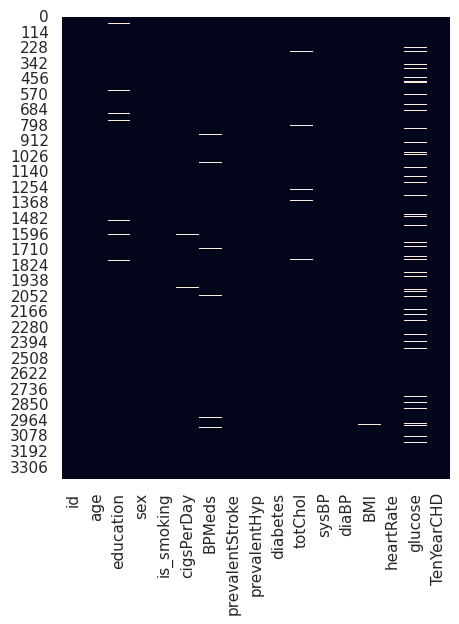

In [126]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(dataset_cardio.isnull(), cbar=False)

### What did you know about your dataset?

1. The dataset contain 3390 rows and 17 columns. Among 17 column 15 having numeric data and 2 having categorical data.
2. There are 510 which have null values. Education, cigsPerDay,BPMeds,BMI, heartRate, glucose column having missing values.

## ***2. Understanding Your Variables***

In [127]:
# Dataset Columns
dataset_cardio.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [128]:
# Dataset Describe
dataset_cardio.describe(include='all')# describe will generate descriptive statistics of each column

id          age    education   sex is_smoking   cigsPerDay  \
count   3390.000000  3390.000000  3303.000000  3390       3390  3368.000000   
unique          NaN          NaN          NaN     2          2          NaN   
top             NaN          NaN          NaN     F         NO          NaN   
freq            NaN          NaN          NaN  1923       1703          NaN   
mean    1694.500000    49.542183     1.970936   NaN        NaN     9.069477   
std      978.753033     8.592878     1.019081   NaN        NaN    11.879078   
min        0.000000    32.000000     1.000000   NaN        NaN     0.000000   
25%      847.250000    42.000000     1.000000   NaN        NaN     0.000000   
50%     1694.500000    49.000000     2.000000   NaN        NaN     0.000000   
75%     2541.750000    56.000000     3.000000   NaN        NaN    20.000000   
max     3389.000000    70.000000     4.000000   NaN        NaN    70.000000   

             BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count   3346.000000      3390.000000   3390.000000  3390.000000  3352.000000   
unique          NaN              NaN           NaN          NaN          NaN   
top             NaN              NaN           NaN          NaN          NaN   
freq            NaN              NaN           NaN          NaN          NaN   
mean       0.029886         0.006490      0.315339     0.025664   237.074284   
std        0.170299         0.080309      0.464719     0.158153    45.247430   
min        0.000000         0.000000      0.000000     0.000000   107.000000   
25%        0.000000         0.000000      0.000000     0.000000   206.000000   
50%        0.000000         0.000000      0.000000     0.000000   234.000000   
75%        0.000000         0.000000      1.000000     0.000000   264.000000   
max        1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count   3390.00000  3390.000000  3376.000000  3389.000000  3086.000000   
unique         NaN          NaN          NaN          NaN          NaN   
top            NaN          NaN          NaN          NaN          NaN   
freq           NaN          NaN          NaN          NaN          NaN   
mean     132.60118    82.883038    25.794964    75.977279    82.086520   
std       22.29203    12.023581     4.115449    11.971868    24.244753   
min       83.50000    48.000000    15.960000    45.000000    40.000000   
25%      117.00000    74.500000    23.020000    68.000000    71.000000   
50%      128.50000    82.000000    25.380000    75.000000    78.000000   
75%      144.00000    90.000000    28.040000    83.000000    87.000000   
max      295.00000   142.500000    56.800000   143.000000   394.000000   

         TenYearCHD  
count   3390.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean       0.150737  
std        0.357846  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

### Variables Description

1. id:- It refers to ID of person.
2. Sex:- It gives sex of person(Categorical).
3. education:- It tells education of person.
4. Age:- It tells age of person.
5. is_smoking :- It tells whether person is smoking or not (Categorical).
6. Cigs_Per_Day:- It gives amount of cigerate smoke by person per day.
7. BP_Meds:- It tells us whether person is taking BP medicine or not.
8. Prevalent Stroke:- It tells us if the person is having history of stroke.
9. Prevalent hyp:-It tells us if the person is having history of hypertension.
10. Diabetes:- It tells us if the person is having Diabetes or not.
11. Tot Chol:- It refers to measure of cholestrol.
12. Sys BP:- It tells BP measure.
13. Dia BP:- It tells BP measure.
14. BMI:- It refers to Body mass Index.
15. glucose:- It refers to glucose measure of person.
16. heartRate:- It refers to heartrate measure of person.
17. TenYearCHD:- It tells whether person will have 10 year risk of future coronary heart disease.

### Check Unique Values for each variable.

In [129]:
# Check Unique Values for each variable.
for i in dataset_cardio.columns.tolist():
  print("No. of unique values in ",i,"is",dataset_cardio[i].nunique(),".")   #nunique gives no. of distinct elements in each column.

No. of unique values in  id is 3390 .
No. of unique values in  age is 39 .
No. of unique values in  education is 4 .
No. of unique values in  sex is 2 .
No. of unique values in  is_smoking is 2 .
No. of unique values in  cigsPerDay is 32 .
No. of unique values in  BPMeds is 2 .
No. of unique values in  prevalentStroke is 2 .
No. of unique values in  prevalentHyp is 2 .
No. of unique values in  diabetes is 2 .
No. of unique values in  totChol is 240 .
No. of unique values in  sysBP is 226 .
No. of unique values in  diaBP is 142 .
No. of unique values in  BMI is 1259 .
No. of unique values in  heartRate is 68 .
No. of unique values in  glucose is 132 .
No. of unique values in  TenYearCHD is 2 .


## 3. ***Data Wrangling***

### Data Wrangling Code

####3.1 Handling Missing Value

#####3.1.1 Handling Missing Value in Education Column

In [130]:
# Write your code to make your dataset analysis ready.
dataset_cardio['education'].value_counts()# checking unique value for eduction column and it's count

1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

 In the education column I will replace it with mode value i.e. 1.

In [131]:
dataset_cardio["education"].fillna(1, inplace = True) # replacing null value with 1

#####3.1.2 Handling Missing Value in cigsPerDay

In [132]:
dataset_cardio['cigsPerDay'].value_counts()# checking unique value for cigsPerDay column and it's count

0.0     1703
20.0     606
30.0     176
15.0     172
10.0     106
9.0      104
5.0      103
3.0       79
40.0      62
1.0       48
25.0      44
43.0      42
35.0      17
2.0       17
6.0       14
8.0       10
7.0        8
60.0       8
18.0       7
4.0        7
50.0       6
17.0       5
23.0       5
11.0       4
12.0       3
13.0       3
19.0       2
16.0       2
45.0       2
14.0       1
70.0       1
38.0       1
Name: cigsPerDay, dtype: int64

Here, I will replace with "0" if is_smoking is False else I will replace with median value.

In [133]:
#taking index of rows whose 'cigsPerDay' column having null value
null_cigsPerDay = dataset_cardio[(pd.isnull(dataset_cardio['cigsPerDay'])) ].index

In [134]:
#  printing those rows whose cigsPerDay value is null.
df2=dataset_cardio.take(null_cigsPerDay)
print(df2)

        id  age  education sex is_smoking  cigsPerDay  BPMeds  \
422    422   55        1.0   F        YES         NaN     0.0   
466    466   45        3.0   M        YES         NaN     0.0   
469    469   42        1.0   M        YES         NaN     0.0   
491    491   61        1.0   F        YES         NaN     0.0   
538    538   41        1.0   F        YES         NaN     0.0   
767    767   54        1.0   M        YES         NaN     0.0   
1461  1461   47        2.0   F        YES         NaN     0.0   
1467  1467   49        1.0   F        YES         NaN     0.0   
1597  1597   57        1.0   F        YES         NaN     0.0   
1986  1986   49        2.0   F        YES         NaN     0.0   
2031  2031   58        4.0   F        YES         NaN     0.0   
2087  2087   49        4.0   M        YES         NaN     0.0   
2240  2240   47        3.0   F        YES         NaN     0.0   
2284  2284   45        2.0   M        YES         NaN     0.0   
2527  2527   58        2.

Here, I have found that we have null value for "cigPerday" column those rows having "is_smoking" column value "yes" so I will replace with mode of patient whose "is_smoking" is "yes".

In [135]:
#replacing null values with mode of of patient whose "is_smoking" is "yes".
dataset_cardio['cigsPerDay'].fillna((dataset_cardio[dataset_cardio['is_smoking']=='YES']['cigsPerDay'].mode()).values[0],inplace=True)

#####3.1.3 Handling Missing Value in BPMeds

In [136]:
dataset_cardio['BPMeds'].value_counts()# checking unique value for BPMeds column and it's count

0.0    3246
1.0     100
Name: BPMeds, dtype: int64

Here, I will replace null value with '0'

In [137]:
dataset_cardio["BPMeds"].fillna(0, inplace = True) # replacing null values of BPMeds column to zero.

#####3.1.4 Handling Missing Value in totChol

In [138]:
dataset_cardio['totChol'].value_counts()# checking unique value for totChol column and it's count

240.0    65
210.0    51
220.0    48
260.0    46
232.0    45
         ..
137.0     1
113.0     1
392.0     1
353.0     1
364.0     1
Name: totChol, Length: 240, dtype: int64

In [139]:
dataset_cardio["totChol"].fillna(dataset_cardio["totChol"].median(), inplace = True)# replacing null values of totChol column to median of totchol.

#####3.1.5 Handling Missing Value in glucose

In [140]:
dataset_cardio['glucose'].value_counts()# checking unique value for glucose column and it's count

75.0     149
83.0     135
70.0     123
77.0     122
80.0     118
        ... 
191.0      1
119.0      1
43.0       1
256.0      1
274.0      1
Name: glucose, Length: 132, dtype: int64

Here I will replace null value with median value.

In [141]:
dataset_cardio["glucose"].fillna(dataset_cardio["glucose"].median(), inplace = True)# replacing null values of glucose column to median of glucose.

#####3.1.5 Handling Missing Value in BMI

In [142]:
dataset_cardio['BMI'].value_counts()# checking unique value for BMI column and it's count

22.91    17
22.54    16
22.19    15
23.48    12
25.09    12
         ..
19.54     1
19.87     1
35.01     1
21.29     1
31.09     1
Name: BMI, Length: 1259, dtype: int64

Here I will replace null value with median value.

In [143]:
dataset_cardio["BMI"].fillna(dataset_cardio["BMI"].median(), inplace = True)# replacing null values of BMI column to median of BMI.

#####3.1.5 Handling Missing Value in heartrate

In [144]:
dataset_cardio['heartRate'].value_counts()# checking unique value for heartRate column and it's count

75.0     442
80.0     298
70.0     241
85.0     191
72.0     184
        ... 
47.0       1
143.0      1
51.0       1
140.0      1
97.0       1
Name: heartRate, Length: 68, dtype: int64

Here I will replace null value with median value.

In [145]:
dataset_cardio["heartRate"].fillna(dataset_cardio["heartRate"].median(), inplace = True)# replacing null values of heartRate column to median of heartRate.

In [146]:
# checking generate descriptive statistics of each column after handling null values.
dataset_cardio.describe()

id          age    education   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3390.000000  3390.000000  3390.000000   
mean   1694.500000    49.542183     1.946018     9.140413     0.029499   
std     978.753033     8.592878     1.017568    11.872952     0.169224   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%     847.250000    42.000000     1.000000     0.000000     0.000000   
50%    1694.500000    49.000000     2.000000     0.000000     0.000000   
75%    2541.750000    56.000000     3.000000    20.000000     0.000000   
max    3389.000000    70.000000     4.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count      3390.000000   3390.000000  3390.000000  3390.000000  3390.00000   
mean          0.006490      0.315339     0.025664   237.039823   132.60118   
std           0.080309      0.464719     0.158153    44.994205    22.29203   
min           0.000000      0.000000     0.000000   107.000000    83.50000   
25%           0.000000      0.000000     0.000000   206.000000   117.00000   
50%           0.000000      0.000000     0.000000   234.000000   128.50000   
75%           0.000000      1.000000     0.000000   264.000000   144.00000   
max           1.000000      1.000000     1.000000   696.000000   295.00000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  3390.000000  3390.000000  3390.000000  3390.000000  3390.000000  
mean     82.883038    25.793251    75.976991    81.720059     0.150737  
std      12.023581     4.107026    11.970114    23.161265     0.357846  
min      48.000000    15.960000    45.000000    40.000000     0.000000  
25%      74.500000    23.030000    68.000000    72.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    27.997500    83.000000    85.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

### What all manipulations have you done and insights you found?

1.   I have replaced education column null value with mode value.
2.   I have replaced cigsPerDay column null value with mode value.
3.   I have replaced BPMeds, totChol, glucose, BMI, heartrate column null value with median value.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## ***4.1 Univariate Analysis***

#### Chart - 1 Univariate Analysis:-TenYearCHD

0    0.849263
1    0.150737
Name: TenYearCHD, dtype: float64
 


<Axes: ylabel='TenYearCHD'>

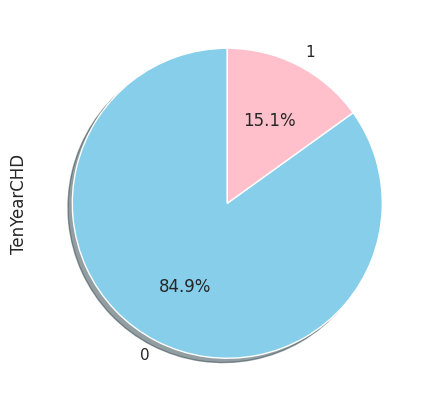

In [147]:
# Chart - 1 visualization code
# Dependant Column Value Counts
print(dataset_cardio.TenYearCHD.value_counts(normalize=True)) #This will gives us no. of occurance of each unique value from TenYearCHD column
print(" ")
# Dependant Variable Column Visualization
dataset_cardio['TenYearCHD'].value_counts().plot(kind='pie',
                              figsize=(5,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['0','1'],
                               colors=['skyblue','pink'],
                               explode=[0,0]
                              )#plotting pie chart of TenYearCHD column

##### 1. Why did you pick the specific chart?

A pie chart is a graph that represents the data in circular graph. The pie means whole and slice means the part of whole. The slices of pie shows the relative size of the data. A pie chart requires a list of categorical variables and numerical variables. TenYearCHD has categorical variable. In order to find percentage of person with having possibality of ten year coronary disease, I used pie chart.

##### 2. What is/are the insight(s) found from the chart?

1. Around 84.9% people donot have 10 year risk of future coronary heart disease and 15.1% people having risk of future coronary heart disease.
2. The value "0" means there is no risk of Coronary heart disease,
   "1" refers to risk of coronary heart disease.
3. The given data is imbalance dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By looking at the chart, I cannot say any impact on the data, only I can say data is imbalance.

#### Chart - 2 Univariate analysis (prevalentStroke, sex , is_smoking , BPMeds ,prevalentHyp , diabetes ) Categorical


0    0.99351
1    0.00649
Name: prevalentStroke, dtype: float64


F    0.567257
M    0.432743
Name: sex, dtype: float64


NO     0.50236
YES    0.49764
Name: is_smoking, dtype: float64


0.0    0.970501
1.0    0.029499
Name: BPMeds, dtype: float64


0    0.684661
1    0.315339
Name: prevalentHyp, dtype: float64


0    0.974336
1    0.025664
Name: diabetes, dtype: float64



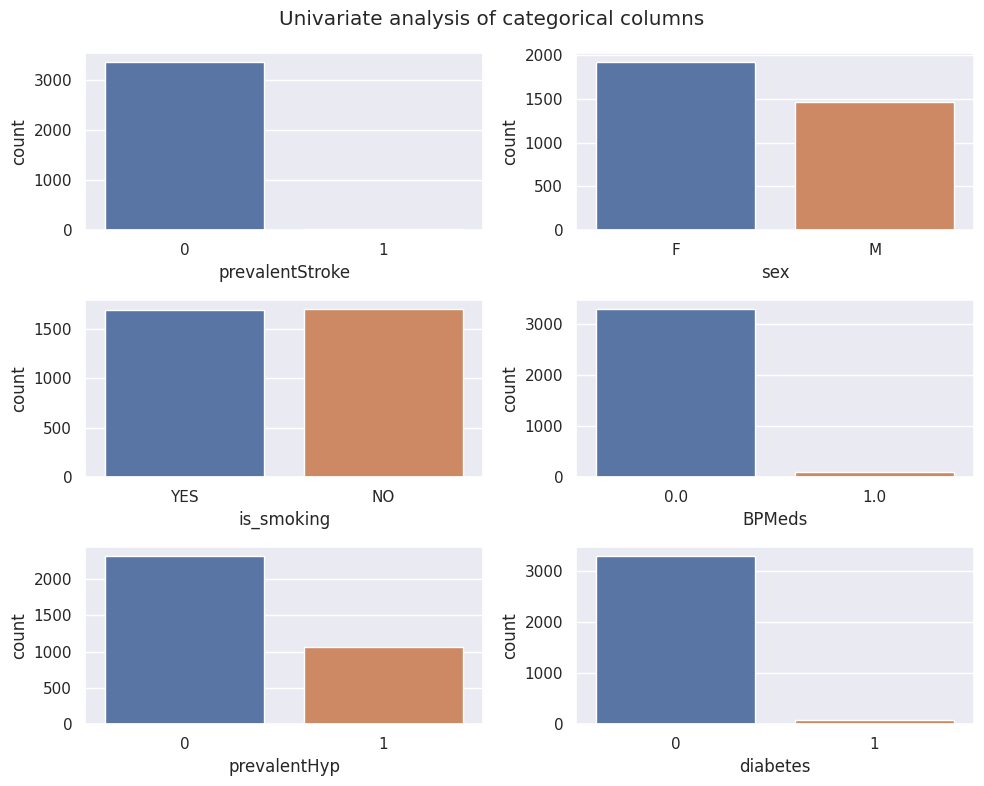

In [148]:
# Chart - 2 visualization code
# visualisation code for univariate analysis of categorical column
list_categorical_column=['prevalentStroke', 'sex' , 'is_smoking' , 'BPMeds' ,'prevalentHyp' , 'diabetes' ] #taking categorical variable name into list.

plt.figure(figsize = (10,8));# setting fig. size
plt.suptitle('Univariate analysis of categorical columns')# title for all subplot
for i,column in enumerate(list_categorical_column) :
    print("")
    print( dataset_cardio[column].value_counts(normalize=True))# printing unique values an it's count from categorical column.
    print("")
    plt.subplot(3,2,i+1)# subplot provide multiple plot in single figure
    sns.countplot(x = column, data=dataset_cardio)#plotting count plot for each categorical column
    plt.tight_layout()# automatically adjusting subplot to give specified padding

##### 1. Why did you pick the specific chart?

A bar chart is graph represents categorical data with rectangular bars with heights or lengths proportional to the values that present. The bars can be plotted vertically or horizontally. To show number of Person per each categorical column I used Bar chart.

##### 2. What is/are the insight(s) found from the chart?

1. Around 99% people do not have previous stroke history. In prevalentStroke column '0' refer people do not have stroke history while '1' refer to people having stroke histrory.  
2. In sex column value F referes to female and value "M" refers to male. There are approximate 56% females and 44% are male.
3. 50% peoples are smoking. In is_smoking column 'O' refer to people are not smoking while '1' refer to people are smoking.
4. 97% of people are not taking BP medicine. In BpMeds column '0' refer to people are not taking bp medicine while '1' referes to people are taking medicine.
5. 68% people are having hypertension, in prevalentHyp column '0' refer to people are not having history of hypertension. while '1' referes to people are having history of hypertension.
6. 97% people are having diabetes, in diabetes column '0' refer to people are not having diabetes,  while '1' referes to people are having diabetes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It helps to find how the data is distributed in discrete variable.

#### Chart - 3 Univariate Analysis (age, cigsPerDay, totChol, sysBP, diaBP, BMI, heartRate, glucose) Numerical

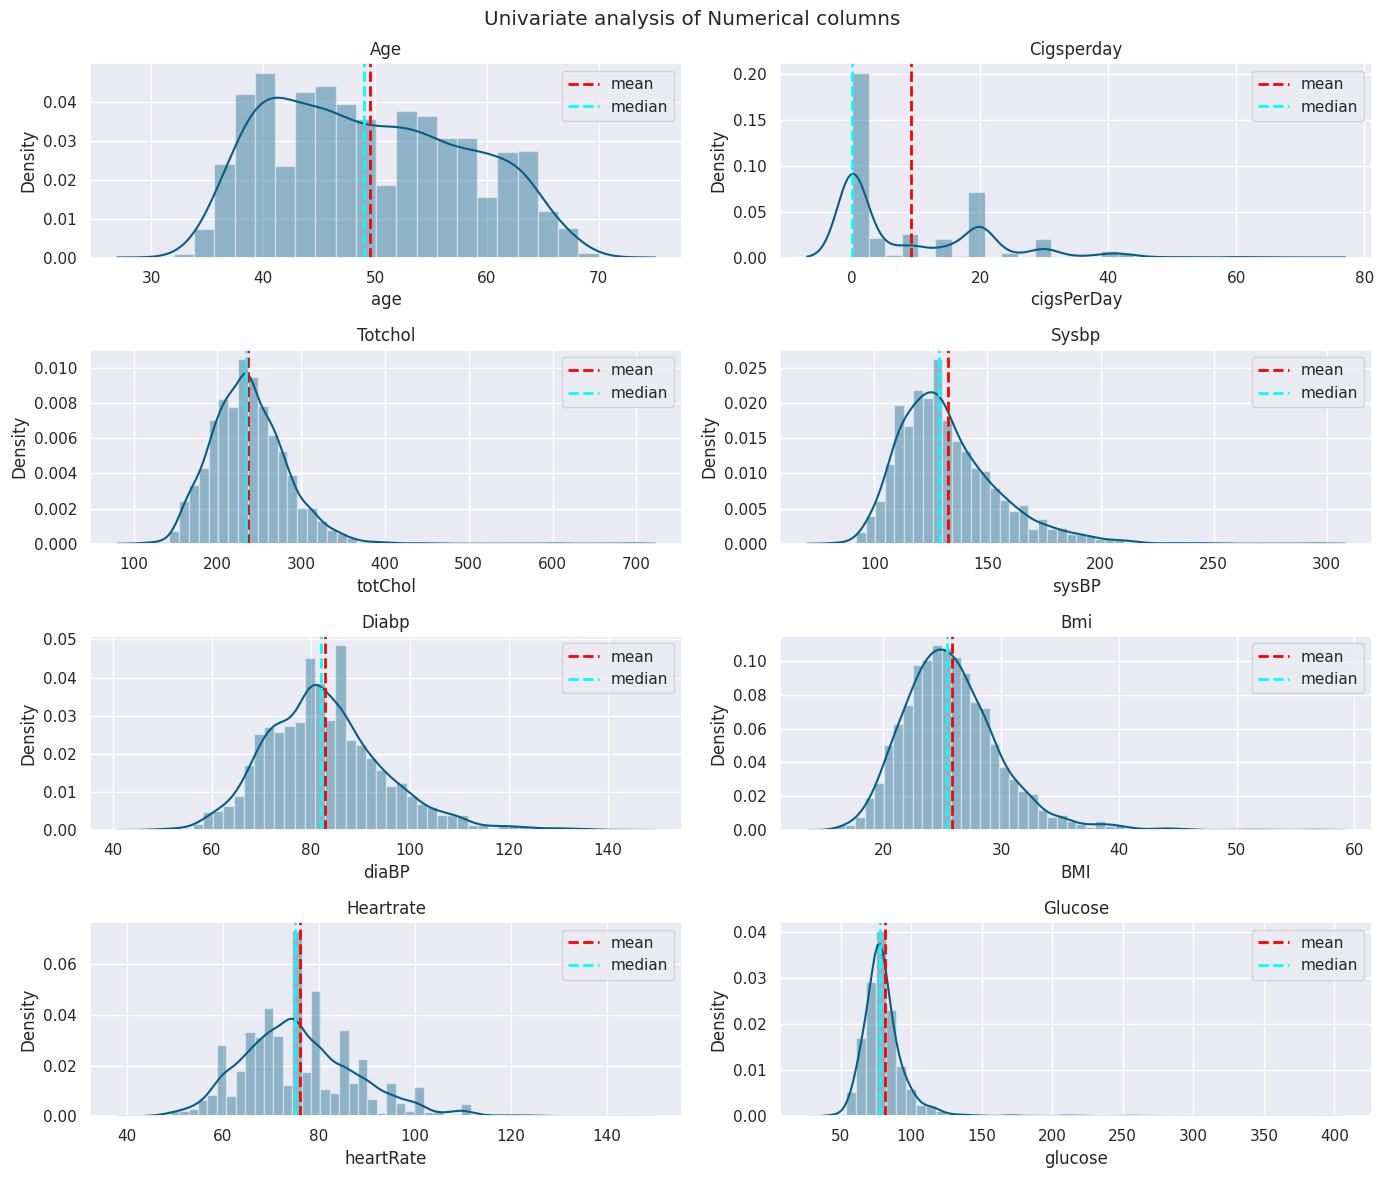

In [149]:
# Chart - 3 visualization code
# visualisation code for univariate analysis of numerical column
list_numerical_column=['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate' , 'glucose']#taking numerical variable name into list.

plt.figure(figsize = (14,12)); # setting fig.size
plt.suptitle('Univariate analysis of Numerical columns')#common title for all plot
for i,column in enumerate(list_numerical_column):

    plt.subplot(4,2,i+1);
    sns.distplot(dataset_cardio[column], color = '#055E85');#plotting distibution plot for each numeric variable
    plt.axvline(dataset_cardio[column].mean(), color='red', linestyle='dashed', linewidth=2,label= 'mean');  #plotting mean line for variable
    plt.axvline(dataset_cardio[column].median(), color='cyan', linestyle='dashed', linewidth=2,label='median');  #plotting median line for variable
    plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')#legend for each subplot
    plt.title(f'{column.title()}'); #title for each subplot
    plt.tight_layout();# automatically adjusting subplot to give specified padding

##### 1. Why did you pick the specific chart?

Distribution plots are used  for visualizing the distribution of data. It helps to find the shape of distribution of data, the presense of outlier.

##### 2. What is/are the insight(s) found from the chart?

1. Only age column having normal distribution, rest having skewed distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It helps to find whether attribute require transformation of data.

## ***4.2 Bivariate Analysis***

#### Chart - 4 Bivariate analysis (prevalentStroke, sex , is_smoking , BPMeds ,prevalentHyp , diabetes ) Categorical with TenYearCHD (dependant Variable)

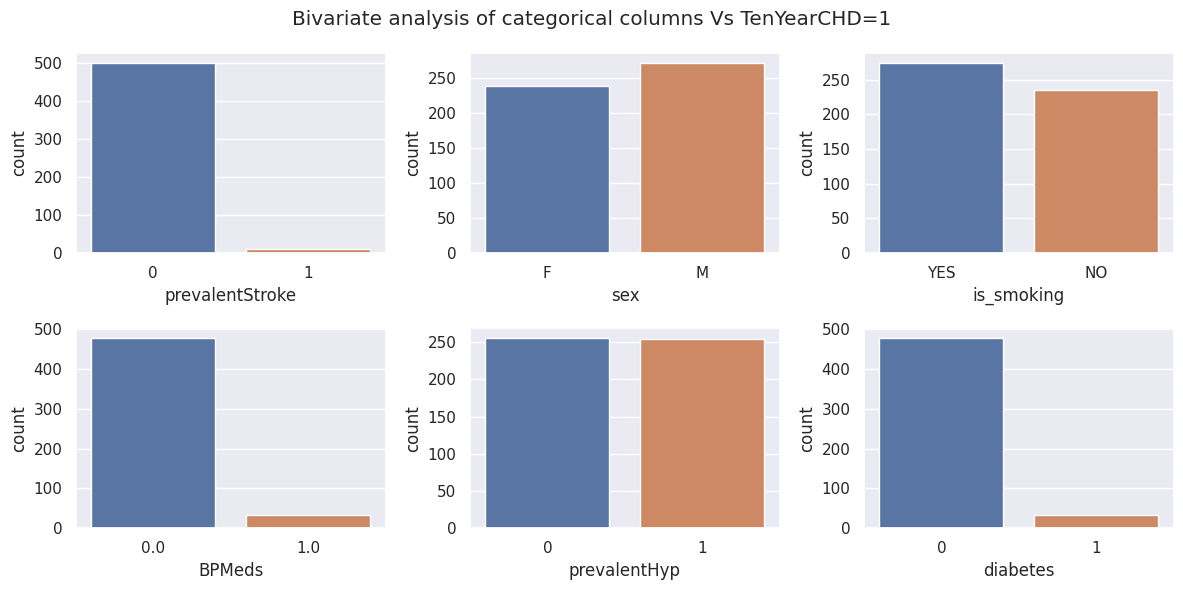

In [150]:
# Chart - 4 visualization code

list_categorical_column=['prevalentStroke', 'sex' , 'is_smoking' , 'BPMeds' ,'prevalentHyp' , 'diabetes' ]#taking Catogorical variable name into list.


df_TenYearCHD_Y=dataset_cardio[dataset_cardio["TenYearCHD"]==1] # taking only those rows who is having 10-year risk of future coronary heart disease(CHD)
plt.figure(figsize = (12,6)); #setting fig. size
plt.suptitle('Bivariate analysis of categorical columns Vs TenYearCHD=1')# setting supertitle for all subplot
for i,column in enumerate(list_categorical_column) :

    plt.subplot(2,3,i+1)
    sns.countplot(x = column, data=df_TenYearCHD_Y)#plotting countplot for each categorical variable where TenYearCHD=1.
    plt.tight_layout()# automatically adjusting subplot to give specified padding

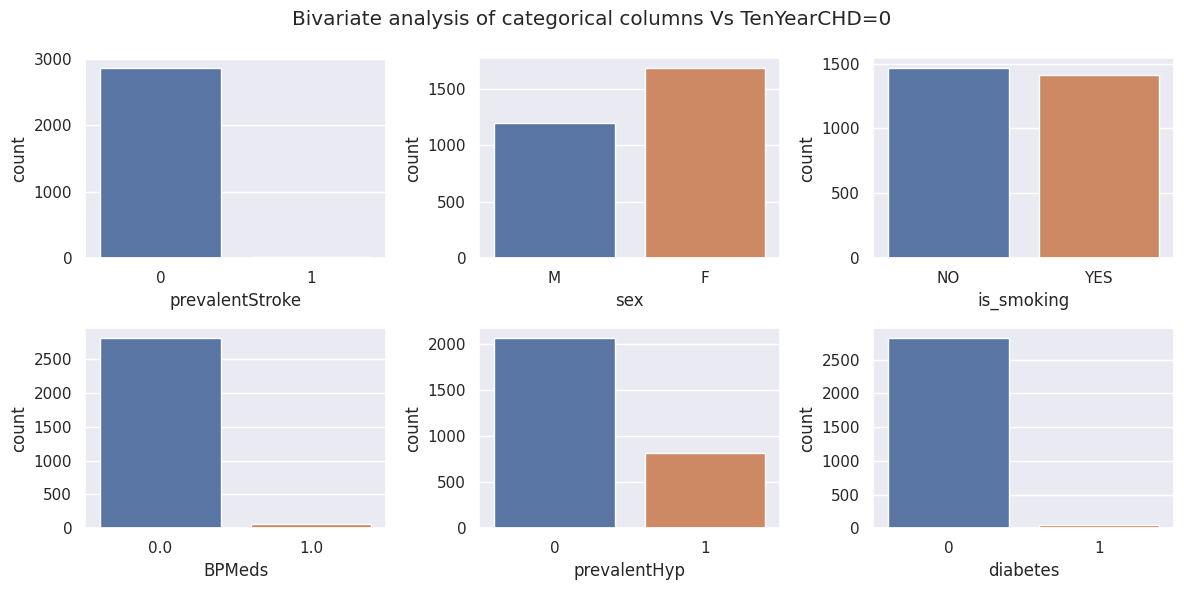

In [151]:
list_categorical_column=['prevalentStroke', 'sex' , 'is_smoking' , 'BPMeds' ,'prevalentHyp' , 'diabetes' ] #taking Catogorical variable name into list.

df_TenYearCHD_N=dataset_cardio[dataset_cardio["TenYearCHD"]==0]# taking only those rows who is not having 10-year risk of future coronary heart disease(CHD)
plt.figure(figsize = (12,6));
plt.suptitle('Bivariate analysis of categorical columns Vs TenYearCHD=0') ## setting supertitle for all subplot
for i,column in enumerate(list_categorical_column) :

    plt.subplot(2,3,i+1)
    sns.countplot(x = column, data=df_TenYearCHD_N)#plotting countplot for each categorical variable where TenYearCHD=1.
    plt.tight_layout()# automatically adjusting subplot to give specified padding

##### 1. Why did you pick the specific chart?

A bar chart is graph represents categorical data with rectangular bars with heights or lengths proportional to the values that present. The bars can be plotted vertically or horizontally. To show number of Person per each Categorical column vs TenYearCHD=1 I used Bar chart.

##### 2. What is/are the insight(s) found from the chart?

1. The person who is having risk of TenYearCHD got the following observation
 *   Male person are more compared to female person.
 *   There are more chances of people who are smoking compared to people are smoking.
 * There are 50-50% chances of people having hypertesion.

2.  People donot have stroke history and people donot take Bp medicine , pople donot have diabetes and dnpt have hyper tension also having less chance of risk of TenYearCHD.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this observation can be useful for preventive measure in future coronary heart disease.

#### Chart - 5 Bivariate analysis ('age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate' , 'glucose')Numerical with TenYearCHD (dependant Variable)

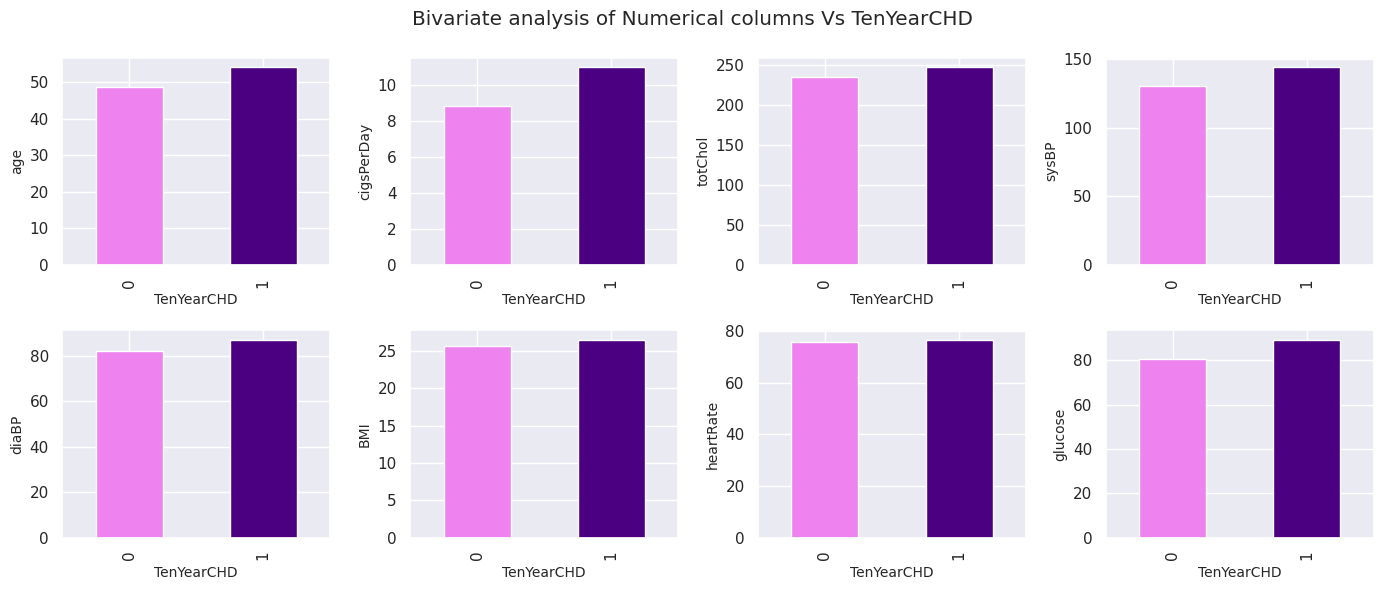

In [152]:
# Chart - 5 visualization code
plt.figure(figsize = (14,6));
plt.suptitle('Bivariate analysis of Numerical columns Vs TenYearCHD')# setting supertitle for all subplot
for i,column in enumerate(list_numerical_column):
    lstTenYearCHD=(dataset_cardio.groupby(['TenYearCHD'])[column].mean()).reset_index()['TenYearCHD'].values. tolist() # taking unique value of TenYearCHD in list
    xaxis = np.arange(len(lstTenYearCHD)) # taking xaxis value from 0 to length of unique key - 1
    plt.subplot(2,4,i+1);

    # plotting bar chart of numerical column vs TenYearCHD
    plt.rcParams['figure.figsize'] = (5, 6)# setting chart/figure size
    color = plt.cm.copper(np.linspace(0, 0.5, 20))
    (dataset_cardio.groupby(['TenYearCHD'])[column].mean()).plot.bar(color = ['violet','indigo'])

    plt.xlabel("TenYearCHD", fontsize = 10)# xlabel for bar chart
    plt.ylabel(column, fontsize = 10)# ylabel for bar chart
   # plt.xticks(xaxis, lstTenYearCHD,rotation=0)# to set tick location and labels of x axis.
    plt.tight_layout();# automatically adjusting subplot to give specified padding

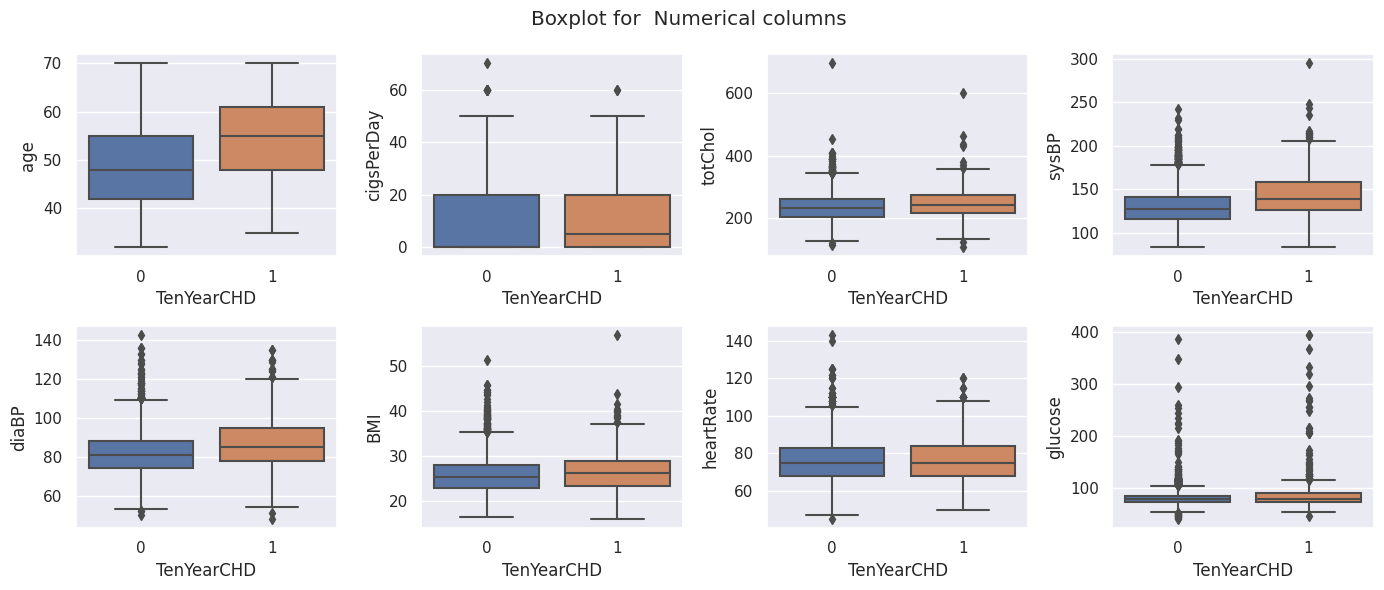

In [153]:
plt.figure(figsize = (14,6)); # setting fig size
plt.suptitle('Boxplot for  Numerical columns ')# setting title for all subplot
for i,column in enumerate(list_numerical_column):
   plt.subplot(2,4,i+1);
   sns.boxplot(x='TenYearCHD',y=column, data=dataset_cardio) #plotting boxplot for numerical column against tenyearchd
   plt.tight_layout()# automatically adjusting subplot to give specified padding



##### 1. Why did you pick the specific chart?

* A bar chart is graph represents categorical data with rectangular bars with heights or lengths proportional to the values that present. The bars can be plotted vertically or horizontally. To show comparision  of median of numerical column with dependant variable I used Bar chart.
* Box plot gives visual representation of 5 number summary. 5 number summary include minimum, maxiumum, 25th percentile,50th percentile, 75th percentile of particular numerical column.

##### 2. What is/are the insight(s) found from the chart?

From the above barchart I got the following observation.
1. Mean of Age, cigPerDay, glucose of person having TenYearCHD is greater than mean of person not having TenYearCHD.

2.  Mean totchol, sysBP, diaBP, BMI of person having TenYearCHD is slightly greater than Mean of person not having TenYearCHD.

3. Mean heartrate of person having TenYearCHD is  approximately equal to Mean of person not having TenYearCHD.

4. By looking at boxplot, I can say all numerical column contain outlier except age column.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can be useful for identifying potential risk factors for heart disease.

#### Chart -7 Bivariate Analysis(Sysbp, Diabp) Numerical with Numerical

Text(0.5, 1.0, 'Scatterplot of sysBP Vs diaBP')

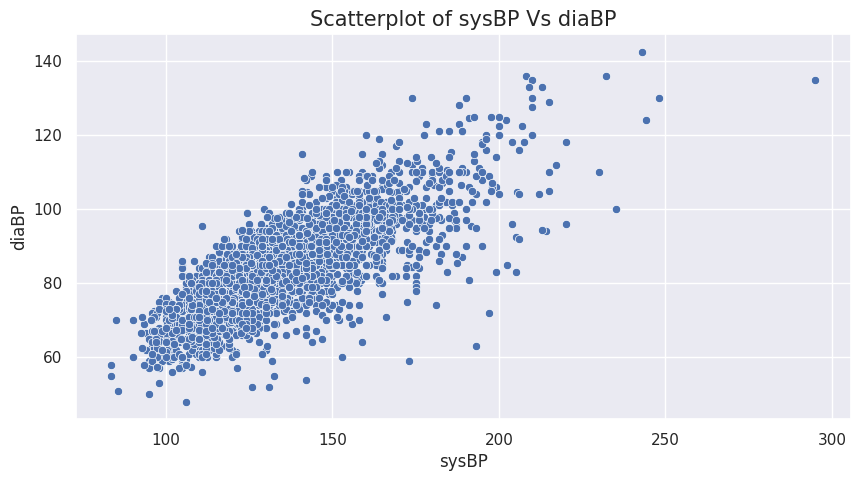

In [154]:
# Chart - 6 visualization code
#plotting scatterplot against sysBP and diaBP
fig, ax = plt.subplots(figsize=(10, 5)) #setting fig. size
sns.scatterplot(data=dataset_cardio, x="sysBP", y="diaBP",sizes=(10, 200))#plotting scatterplot of sysbp vs diabp
plt.title("Scatterplot of sysBP Vs diaBP",fontsize = 15)# title for scatterplot


##### 1. Why did you pick the specific chart?

A scatter plot is a figure where each value in the data set is represented by a dot. It shows how variable is related to each other. So In order to show the relationship between sysBP and diaBP I choose scatterplot.

##### 2. What is/are the insight(s) found from the chart?

By looking at scatterplot, I found sysBP, diaBP are correlated with each other.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By looking at scatterplot, I can not say any positive or negative impact.

###4.3 Multivariate Analysis

#### Chart - 7 Multivariate Analysis (totchol,diabetes, TenYearCHD)

   TenYearCHD  diabetes  totChol
0           1         1    258.0
1           1         0    241.0
2           0         1    238.5
3           0         0    233.0



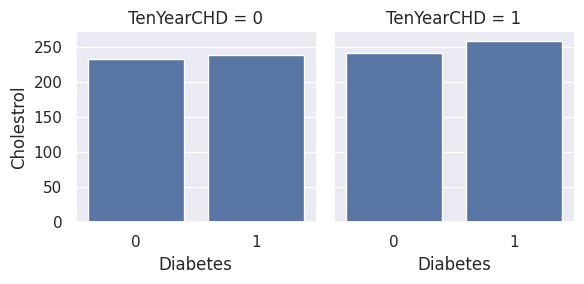

In [155]:
# Chart - 6 visualization code
# grouping with totChol and TenYearCHD and diabetes column
df_gf_totchol_vs_diabetes= dataset_cardio.groupby(['TenYearCHD','diabetes'])['totChol'].median().sort_values(ascending = False).reset_index()

print(df_gf_totchol_vs_diabetes)
print("")
sns.set(font_scale=1)#setting font_scale of seaborn diagram is 1
g = sns.FacetGrid(df_gf_totchol_vs_diabetes, col="TenYearCHD",height=3,margin_titles=True)# taking facetgrid object to plot conditional relationships.
g.map_dataframe(sns.barplot, x="diabetes", y="totChol")#plotting barplot
g.set_xlabels('Diabetes')# setting xlabel
g.set_ylabels('Cholestrol') # setting ylabel

##### 1. Why did you pick the specific chart?

A bar chart is graph represents categorical data with rectangular bars with heights or lengths proportional to the values that present. The bars can be plotted vertically or horizontally.  In order show comparision of cholestrol value of with diabetes patient I used bar chart

##### 2. What is/are the insight(s) found from the chart?

1. Median of cholestrol of people who is having diabetes  and risk of TenYearCHD is higher compared to people who dont have diabetes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. High cholestrol and having diabetes lead to having risk of TenYearCHD. This information is helpful to finding risk of heart disease.

#### Chart -8 Multivariate Analysis (glucose,diabetes, TenYearCHD)

   TenYearCHD  diabetes  glucose
0           1         1    206.0
1           0         1    122.0
2           0         0     78.0
3           1         0     78.0



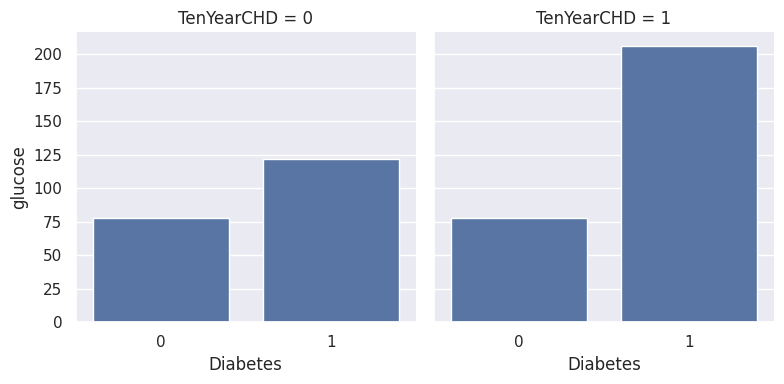

In [156]:
# Chart - 8 visualization code
# grouping with totChol and TenYearCHD and diabetes column
df_gf_glucose_vs_diabetes= dataset_cardio.groupby(['TenYearCHD','diabetes'])['glucose'].median().sort_values(ascending = False).reset_index()

#printing result of glucose on basis of 'TenYearCHD','diabetes'
print(df_gf_glucose_vs_diabetes)
print("")
sns.set(font_scale=1)#setting font_scale of seaborn diagram is 1
g = sns.FacetGrid(df_gf_glucose_vs_diabetes, col="TenYearCHD",height=4,margin_titles=True)# taking facetgrid object to plot conditional relationships.
g.map_dataframe(sns.barplot, x="diabetes", y="glucose")#plotting barplot
g.set_xlabels('Diabetes')# setting xlabel
g.set_ylabels('glucose') # setting ylabel

##### 1. Why did you pick the specific chart?

A bar chart is graph represents categorical data with rectangular bars with heights or lengths proportional to the values that present. The bars can be plotted vertically or horizontally.  In order show comparision of Glucose value of with diabetes patient I used bar chart.

##### 2. What is/are the insight(s) found from the chart?

* Mean of glucose with people having diabetes and having risk of ten year coronary disease is higher compared to people not having high risk of coronary disease.
* Thus I can say higher level of glucose can lead higher chances of having coronary disease.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This information is helpful to finding risk of heart disease. As high glucose level can cause risk of coronary disease.

#### Chart - 9 Multivariate Analysis(prevalentHyp, sysbp,TenYearCHD)

   TenYearCHD  prevalentHyp  sysBP
0           1             1  157.0
1           0             1  150.0
2           1             0  126.0
3           0             0  121.0



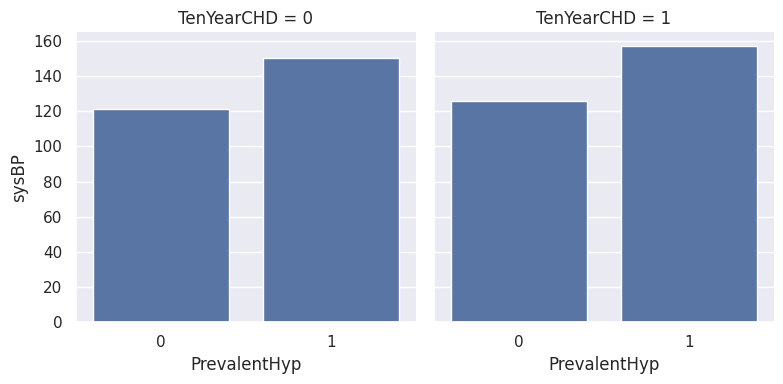

In [157]:
# grouping with sysBP and TenYearCHD and prevalentHyp column
df_gf_sysBP_vs_prevalentHyp= dataset_cardio.groupby(['TenYearCHD','prevalentHyp'])['sysBP'].median().sort_values(ascending = False).reset_index()

#print grouping with sysBP and TenYearCHD and prevalentHyp column
print(df_gf_sysBP_vs_prevalentHyp)
print("")
sns.set(font_scale=1)#setting font_scale of seaborn diagram is 1
g = sns.FacetGrid(df_gf_sysBP_vs_prevalentHyp, col="TenYearCHD",height=4,margin_titles=True)# taking facetgrid object to plot conditional relationships.
g.map_dataframe(sns.barplot, x="prevalentHyp", y="sysBP")#plotting barplot
g.set_xlabels('PrevalentHyp')# setting xlabel
g.set_ylabels('sysBP') # setting ylabel

##### 1. Why did you pick the specific chart?

A bar chart is graph represents categorical data with rectangular bars with heights or lengths proportional to the values that present. The bars can be plotted vertically or horizontally.  In order show comparision of sysbp value of people with history of hypertension patient I used bar chart.

##### 2. What is/are the insight(s) found from the chart?

* Median of sysbp of people having histrory of hypertension and also having risk of coronary disease is higher than people not having risk of coronary disease.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, by looking at bar chart , I can say high sysbp and having history of hypertension lead to risk of high coronary disease.

#### Chart - 10 Multivariate Analysis(prevalentHyp, diabp,TenYearCHD)

   TenYearCHD  prevalentHyp  diaBP
0           1             1   94.0
1           0             1   92.5
2           1             0   80.0
3           0             0   78.0



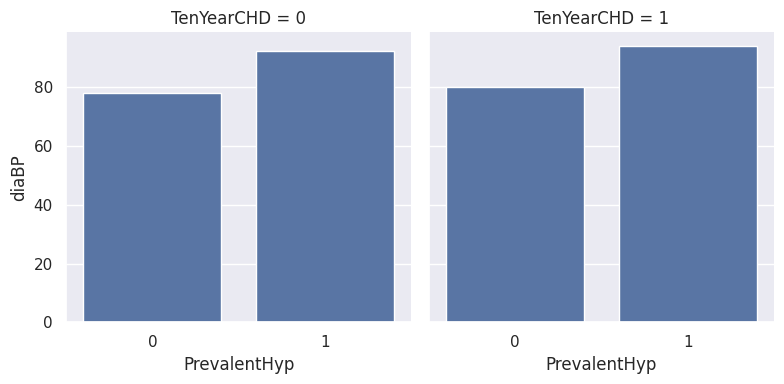

In [158]:
# Chart - 10 visualization code
# grouping with sysBP and TenYearCHD and prevalentHyp column
df_gf_sysBP_vs_prevalentHyp= dataset_cardio.groupby(['TenYearCHD','prevalentHyp'])['diaBP'].median().sort_values(ascending = False).reset_index()

#printing result of grouping with diaBP and TenYearCHD and prevalentHyp column
print(df_gf_sysBP_vs_prevalentHyp)
print("")
sns.set(font_scale=1)#setting font_scale of seaborn diagram is 1
g = sns.FacetGrid(df_gf_sysBP_vs_prevalentHyp, col="TenYearCHD",height=4,margin_titles=True)# taking facetgrid object to plot conditional relationships.
g.map_dataframe(sns.barplot, x="prevalentHyp", y="diaBP")#plotting barplot
g.set_xlabels('PrevalentHyp')# setting xlabel
g.set_ylabels('diaBP') # setting ylabel

##### 1. Why did you pick the specific chart?

A bar chart is graph represents categorical data with rectangular bars with heights or lengths proportional to the values that present. The bars can be plotted vertically or horizontally.  In order show comparision of diabp value of people with history of hypertension patient I used bar chart.

##### 2. What is/are the insight(s) found from the chart?

* Median of diabp of people having histrory of hypertension and also having risk of coronary disease is slightly higher than people not having risk of coronary disease.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, by looking at bar chart , I can say high sysbp and having history of hypertension lead to risk of high coronary disease

#### Chart - 11

In [159]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [160]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [161]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

Text(0.5, 1.0, 'Co-relation of the columns')

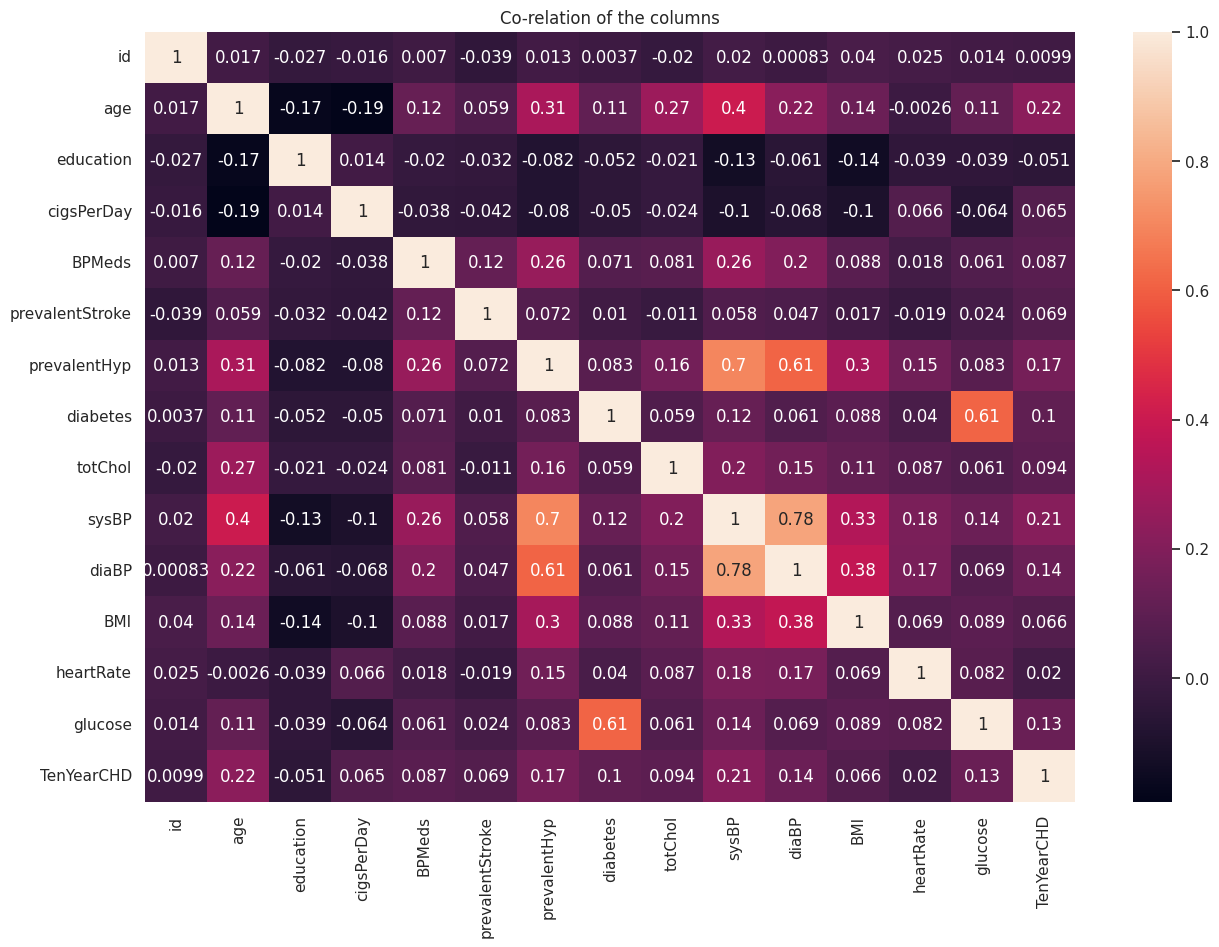

In [162]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,10)) # setting chart/figure size
sns.heatmap(dataset_cardio.corr(),annot=True) # plot heatmap
plt.title('Co-relation of the columns') # plotting title

##### 1. Why did you pick the specific chart?

A correlation matrix is a square matrix showing the correlation coefficients between two variables.The strength and direction of the relationship between two variables in a straight line are determined by the correlation coefficient. In multivariate analysis and statistics, a correlation matrix is typically used to explore the relationships between several variables

##### 2. What is/are the insight(s) found from the chart?

1. prevalentHyp is positively correlated with sysBP and diaBP.
2. SysBP is highly correlated with diaBP .
3. Diabetes is positively correlated with glucose.

#### Chart - 15 - Pair Plot

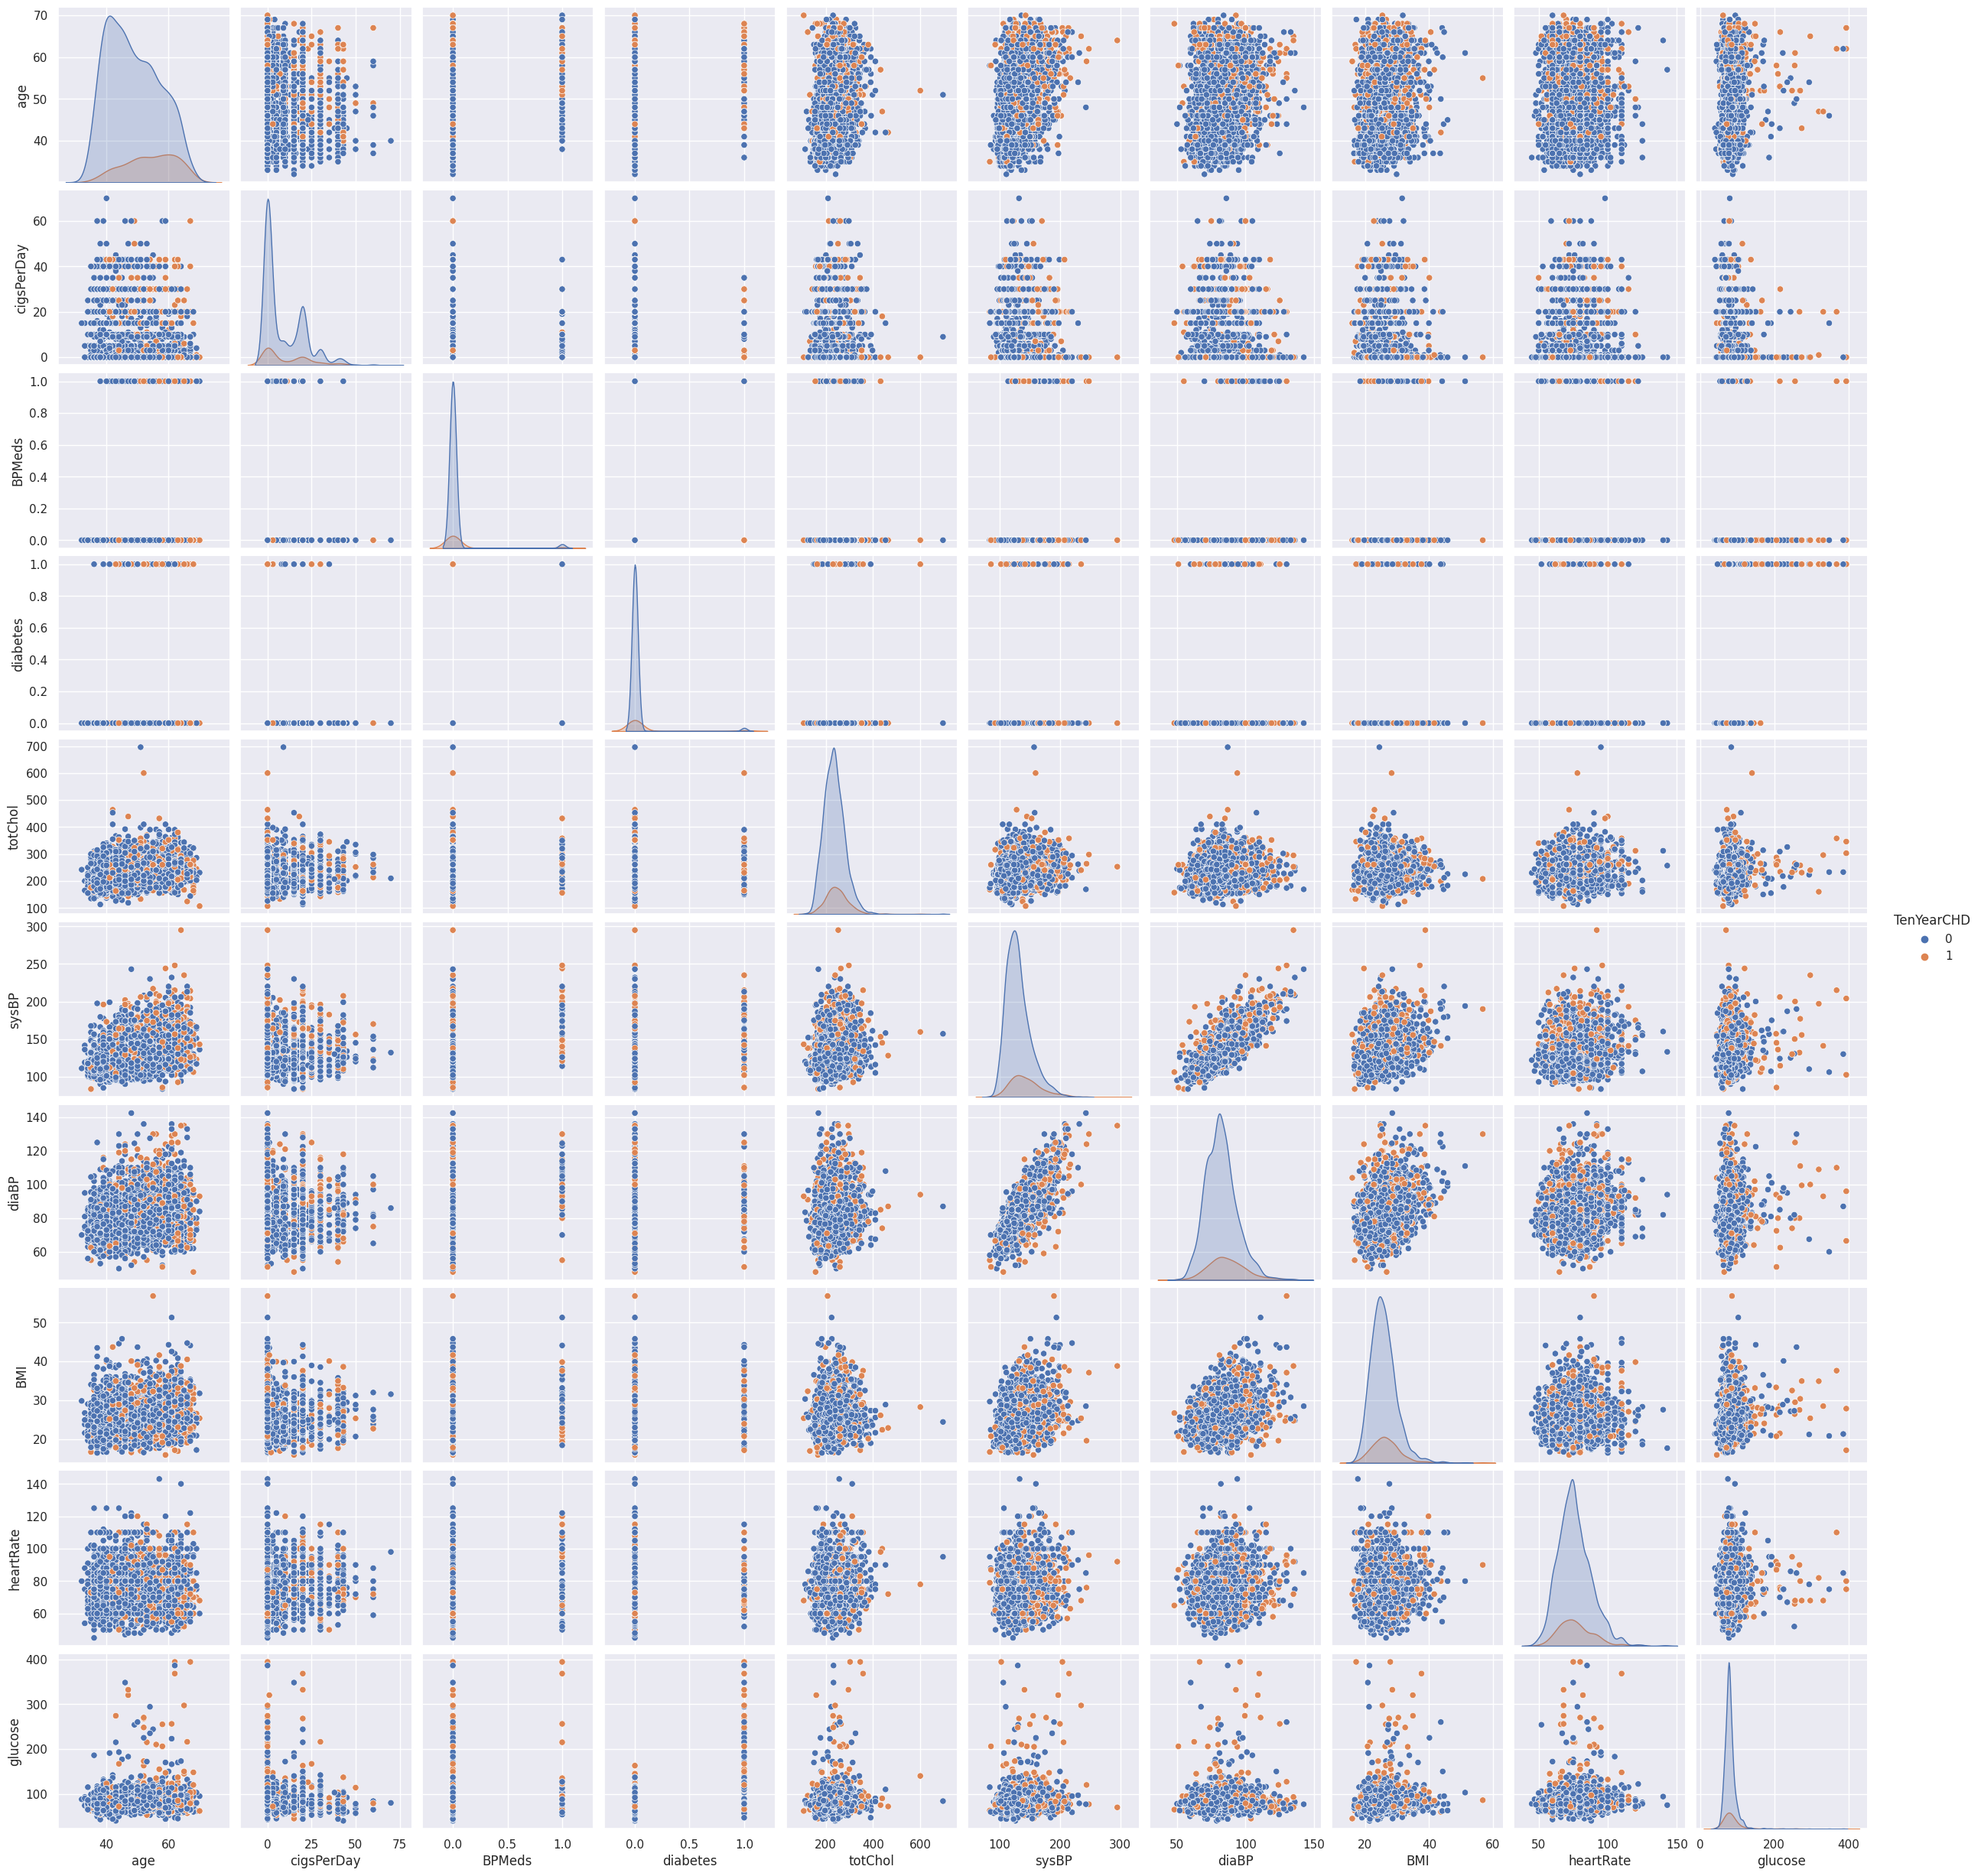

In [163]:
# Pair Plot visualization code
df_numeric=dataset_cardio[['age',  'cigsPerDay', 'BPMeds',
        'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD' ]]
# Pair Plot visualization code
sns.pairplot(df_numeric, hue="TenYearCHD")

##### 1. Why did you pick the specific chart?

Pair plots are used to determine the best combination of features to describe a connection between two variables. Additionally, it is beneficial to create some straightforward classification models by making linear separations in our data or drawing some simple lines.

##### 2. What is/are the insight(s) found from the chart?

From the pair plot I can say data is not linearly seperable.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. SysBP is highly correlated with diaBP.
2. CigperDay is following right tailed distribution.
3. Mean of glucose of person having TenYearCHD is greater than mean of person not having TenYearCHD.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0:- SysBp and diaBp are independent.

H1:- There is dependency between SysBp and diaBp.

#### 2. Perform an appropriate statistical test.

In [164]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr
data1 = dataset_cardio['sysBP']# taking sysBP data into list
data2 = dataset_cardio['diaBP']# taking diaBP data into list
stat, p = pearsonr(data1, data2)# calculating 'P' value
print('stat=%f, p=%f' %(stat, p))
if p > 0.05:
    print('Fail to reject the Null hypothesis i.e. SysBp and diaBp are independent.')
else:
    print('Alternative hypothesis is accepted i.e.SysBp and diaBp are correlated')

stat=0.781908, p=0.000000
Alternative hypothesis is accepted i.e.SysBp and diaBp are correlated


##### Which statistical test have you done to obtain P-Value?

I have used Pearson's Correlation coefficient to obtain P-Value.

##### Why did you choose the specific statistical test?

As data is independent and normally distributed, I choose Pearson's Correlation coefficient.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0:- cigsPerDay is having normal distribution.

H1:- cigsPerDay is not having normal distribution.

#### 2. Perform an appropriate statistical test.

In [165]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import shapiro
data = dataset_cardio['age']# taking sysBP data into list
stat, p = shapiro(data) # calculating p value
print('stat=%f, p=%f' % (stat, p))
if p > 0.05:
   print('Fail to reject the Null hypothesis.')
else:
   print('Alternative hypothesis is accepted')

stat=0.966014, p=0.000000
Alternative hypothesis is accepted


##### Which statistical test have you done to obtain P-Value?

I have used Shapiro Wilk test to obtain P-Value.

##### Why did you choose the specific statistical test?

As the age column is independent and identically distributed , so to check normality , I used shapiro wilk test.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0:Mean of glucose of person having TenYearCHD is equal to mean of person not having TenYearCHD.

H1:Mean of glucose of person having TenYearCHD is unequal to mean of person not having TenYearCHD.

#### 2. Perform an appropriate statistical test.

In [166]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.weightstats import ztest

data1 = dataset_cardio[dataset_cardio["TenYearCHD"]==0]['glucose']# taking glucose value of person who dont have risk of coronary disease
data2 = dataset_cardio[dataset_cardio["TenYearCHD"]==1]['glucose']# taking glucose value of person who  have risk of coronary disease

stat, p = ztest( data2,data1, alternative='two-sided') # calculating p value
print(stat,p)
if p > 0.05:
 print('Fail to reject the Null hypothesis.')
else:
 print('Alternative hypothesis is accepted')


7.839109992025294 4.53750961634131e-15
Alternative hypothesis is accepted


##### Which statistical test have you done to obtain P-Value?

I have used Z test to obtain the P-value.

##### Why did you choose the specific statistical test?

Z test is used when data is independent and data is normally distributed.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [167]:
# Handling Missing Values & Missing Value Imputation
# Count of missing values of each column
dataset_cardio.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [168]:
# Count missing values in the dataset
print(dataset_cardio.isnull().values.sum())

0


#### What all missing value imputation techniques have you used and why did you use those techniques?

1.   I have replaced education,cigsPerDay column null value with mode value.

2.   I have replaced BPMeds,totChol,glucose,BMI,heartrate column null value with median value.


### 2. Handling Outliers

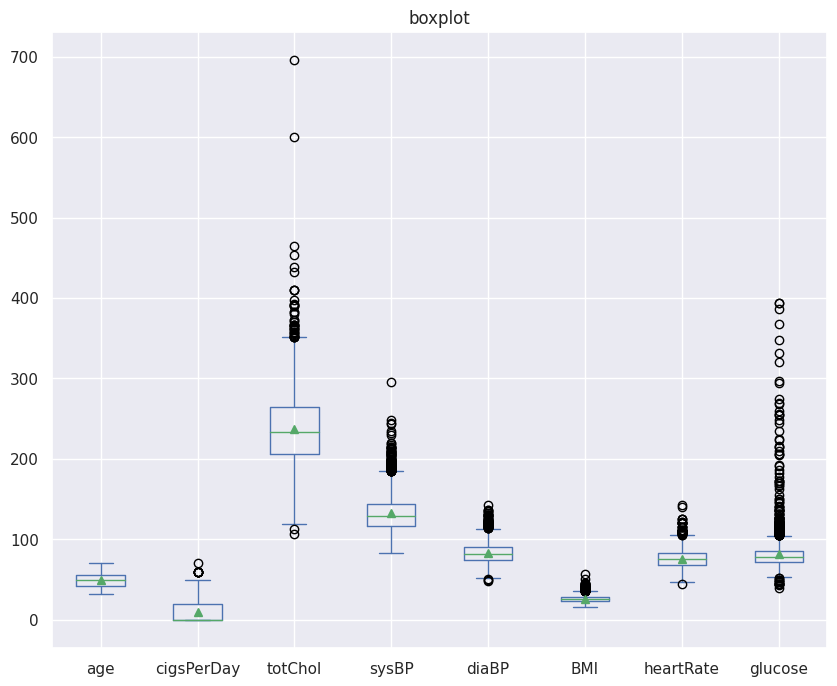

In [169]:
# Handling Outliers & Outlier treatments
#plotting boxplot for all numrical column to check outlier
ax = dataset_cardio[list_numerical_column].plot(kind='box', title='boxplot', showmeans=True,figsize = (10,8))
plt.show()


In [170]:
# Handling Outliers & Outlier treatments
def find_upper_lower_limit(var):
    var = np.sort(var)    # sorting  column values

    q1=var[int(len(var)*(float(25)/100))] #Calculating 25th percentile
    q3=var[int(len(var)*(float(75)/100))] #Calculating 75th percentile

    iqr = q3-q1 #Calculating the inter quatile range (IQR)


    lower_fence= q1-(1.5*iqr)#Calculating lower fence
    upper_fence =q3+(1.5*iqr)#Calculating upper fence


    return lower_fence,upper_fence


In [171]:
for col in list_numerical_column:

     lower,upper=find_upper_lower_limit(dataset_cardio[col].values)
     dataset_cardio=dataset_cardio[(dataset_cardio[col]>=lower )&(dataset_cardio[col]<=upper)]

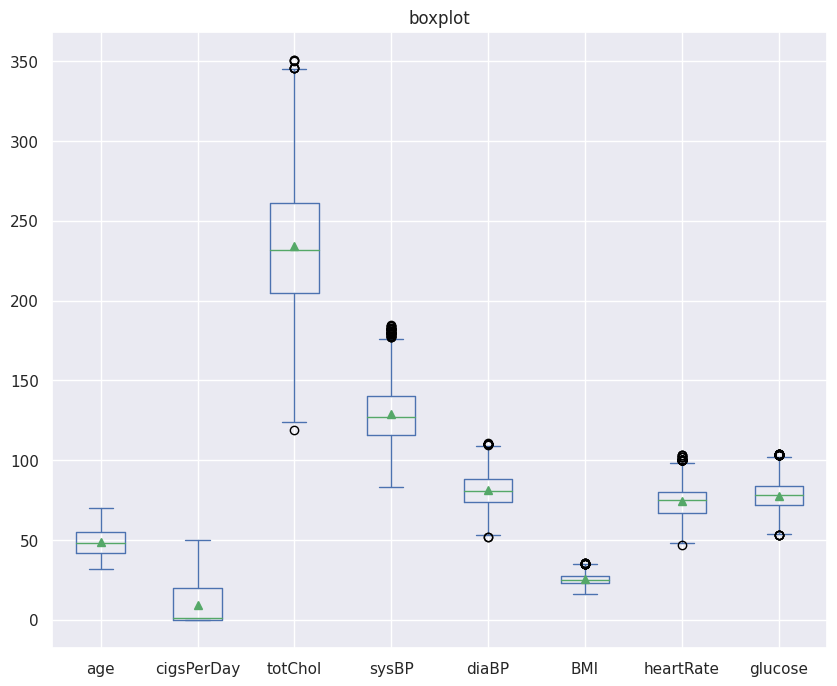

In [172]:
#After removing outlier let's check numerical column.

ax = dataset_cardio[list_numerical_column].plot(kind='box', title='boxplot', showmeans=True,figsize = (10,8))
plt.show()


##### What all outlier treatment techniques have you used and why did you use those techniques?

* In order to identify outlier, I used Interquantile(IQR) range method. In this
method we find 25th percentile i.e.(Q1) then we find 75th percentile (Q3) of data.
* IQR=Q3-Q1 using this formula we calculate IQR , it is also called as midspread.
*After calculating IQR we restrict our data into ,range of lowelimit and upperlimit. By following formula we calculte our lower limit and upper limit.

 lowelimit=Q1-1.5*IQR

 upperlimit=Q3+1.5*IQR

* This method is based on values comes from middle half of the distribution , it is less influened by outlier, that's why I used this method.

### 3. Categorical Encoding

In [173]:
# Encode your categorical columns
dataset_cardio['sex'] = pd.get_dummies(dataset_cardio['sex'], drop_first=True)
dataset_cardio['is_smoking'] = pd.get_dummies(dataset_cardio['is_smoking'], drop_first=True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used one hot encoding, as unique value in bath categorical column was 2, I choose one hot coding to convert non-numeric categorical value into numeric, as machine learning algorithm only understand numeric data.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

**There are no text columns in the given dataset which I am working on. So, Skipping this part.**

#### 1. Expand Contraction

In [174]:
# Expand Contraction

#### 2. Lower Casing

In [175]:
# Lower Casing

#### 3. Removing Punctuations

In [176]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [177]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [178]:
# Remove Stopwords

In [179]:
# Remove White spaces

#### 6. Rephrase Text

In [180]:
# Rephrase Text

#### 7. Tokenization

In [181]:
# Tokenization

#### 8. Text Normalization

In [182]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [183]:
# POS Taging

#### 10. Text Vectorization

In [184]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

By refering this link https://www.cdc.gov/bloodpressure/about.htm I came to know about systostic BP and diastolic BP. According to range of sysBP and disBP I can make 4 category of blood pressure.

1)Normal BP:- Where systolic bp is less than 120 mm Hg and diastolic bp is less than 80 mm Hg.

2)ElevatedBP:- Where systolic bp is between 120-129 mm Hg and diastolic bp is less than 80 mm Hg.

3)Prehypertension:-Where systolic bp is between 130-139 mm Hg and diastolic bp is between 80-89 mm Hg.

4)High blood pressure:- Where systolic bp is greater than 139 mm Hg and diastolic bp is greater tha 89 mm Hg.


In [185]:
# Manipulate Features to minimize feature correlation and create new features

def makecategory(sysbp,diabp):
  #making category depend upon sysbp and diabp
  if sysbp<120 and diabp <80:
        return 1
  elif((sysbp>=120 and sysbp<130) and (diabp<80)) :
        return 2
  elif((sysbp>=130 and sysbp<139) or (diabp>=80 and diabp<90)) :
        return 3
  elif((sysbp>=139) or (diabp>=90)) :
        return 4

# make new column namely bpcategory
dataset_cardio['bpCategory']=None

for index, row in dataset_cardio.iterrows():
   sysbp=row['sysBP']
   diabp=row['diaBP']

   dataset_cardio.loc[index,'bpCategory']=makecategory(sysbp,diabp)

#### 2. Feature Selection

In [186]:
# Select your features wisely to avoid overfitting
dataset_cardio.drop(['sysBP','diaBP'],axis=1,inplace=True) # deleting column sysBP, diaBP
dataset_cardio['bpCategory'] = dataset_cardio['bpCategory'].apply(int)

In [187]:
dataset_cardio.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD', 'bpCategory'],
      dtype='object')

In [188]:
dataset_cardio.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
bpCategory         0
dtype: int64

In [189]:
# Embedded Method of validating the feature importances of selected features
def randomforest_embedded(x,y):
  # Create the random forest eith hyperparameters
  rf= RandomForestClassifier(n_estimators=500)
  # Fit the mmodel
  rf.fit(x,y)
  # get the importance of thr resulting features
  importances= rf.feature_importances_
  # Create a data frame for visualization
  df= pd.DataFrame({"Features": pd.DataFrame(x).columns, "Importances": importances})
  df.set_index('Importances')
  # Sort in ascending order to better visualization
  df= df.sort_values('Importances')

  return rf

In [190]:
dataset_cardio.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD', 'bpCategory'],
      dtype='object')

In [191]:
randomforest_embedded(x=dataset_cardio.drop(["TenYearCHD"],axis=1),y=dataset_cardio["TenYearCHD"])

RandomForestClassifier(n_estimators=500)

##### What all feature selection methods have you used  and why?

I have used embedded method using random forest classifier to find feature importance. Random forest classifier is highly effective, good predictive power, low overfitting and simple to interpret. Interpretability is determine the significance of each variable on the tree decision.

##### Which all features you found important and why?

I will select all 15 the feature as all having some importance in prediction, none of the feature are having zero importance.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [192]:
df=dataset_cardio.copy()

In [193]:
# Transform Your data
# Getting symmetric and skew symmetric features from the cplumns
symmetric_feature=[]
non_symmetric_feature=[]
for i in df.describe().columns:
  if i not in['id','age','sex','is_smoking','prevalentHyp','TenYearCHD','BPMeds', 'prevalentStroke', 'diabetes','education']:
     if abs(df[i].mean()-df[i].median())<1:
        symmetric_feature.append(i)
     else:
        non_symmetric_feature.append(i)

# printing Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)
# printing non symetric feature
print("Non Symmetric Distributed Features : -",non_symmetric_feature)


Symmetric Distributed Features : - ['BMI', 'heartRate', 'glucose', 'bpCategory']
Non Symmetric Distributed Features : - ['cigsPerDay', 'totChol']


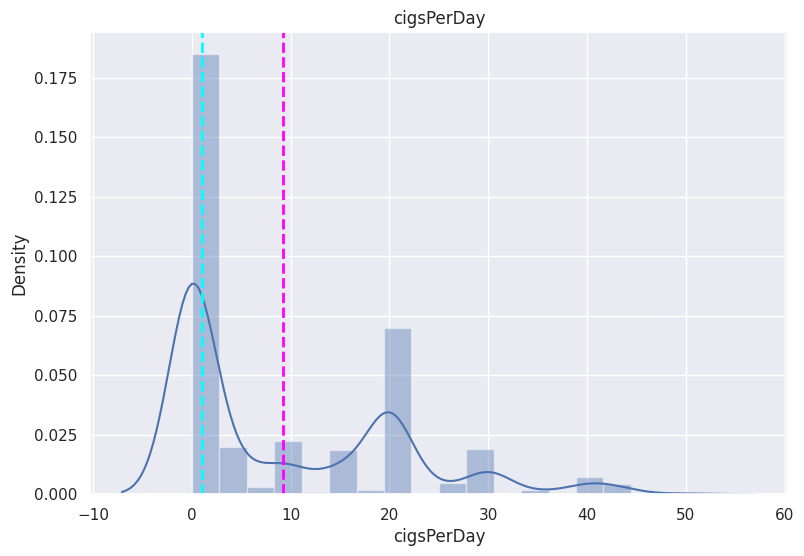

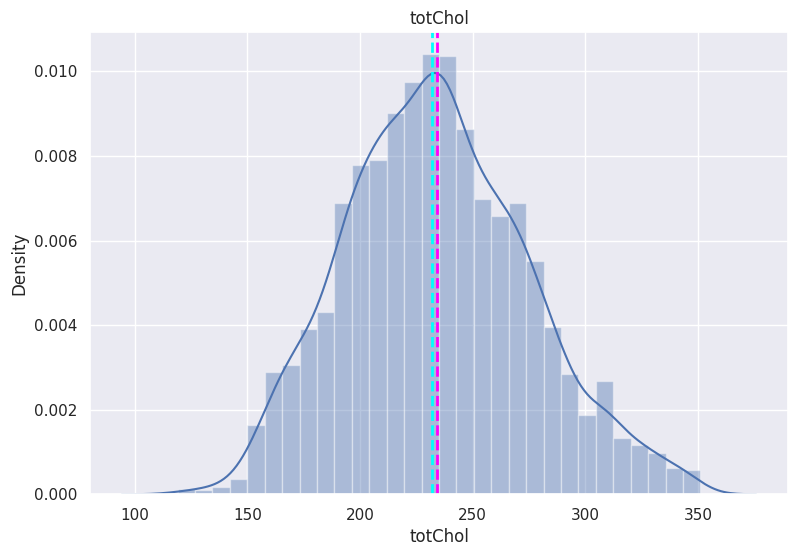

In [194]:
# Visualizing code of hist plot for each columns to know the data distibution
for col in df.loc[:,non_symmetric_feature]:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df[col])
  sns.distplot(df[col])#plotting histogram
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)# plotting mean line for data
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)# plotting median line for data
  ax.set_title(col)
plt.show()

In [195]:
# Transform Your data
#transforming data using exponetial transformation

dataset_cardio['cigsPerDay'] = (dataset_cardio['cigsPerDay'])**0.5
dataset_cardio['totChol'] = (dataset_cardio['totChol'])**0.5


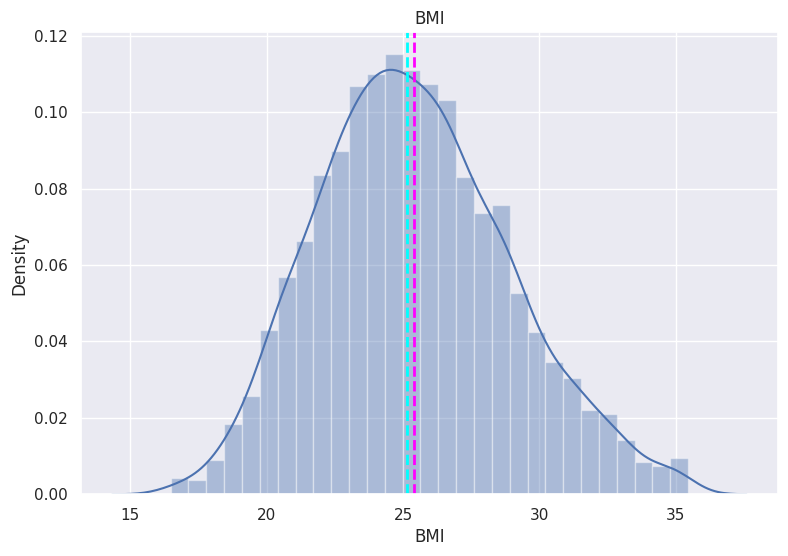

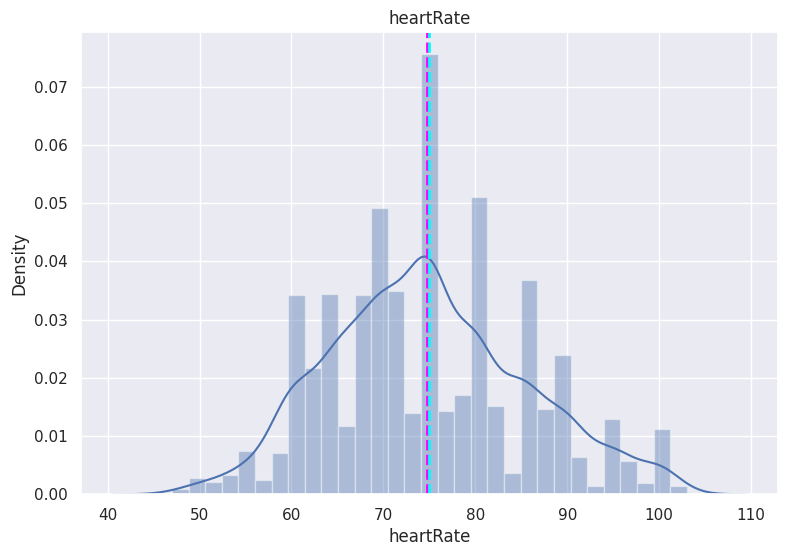

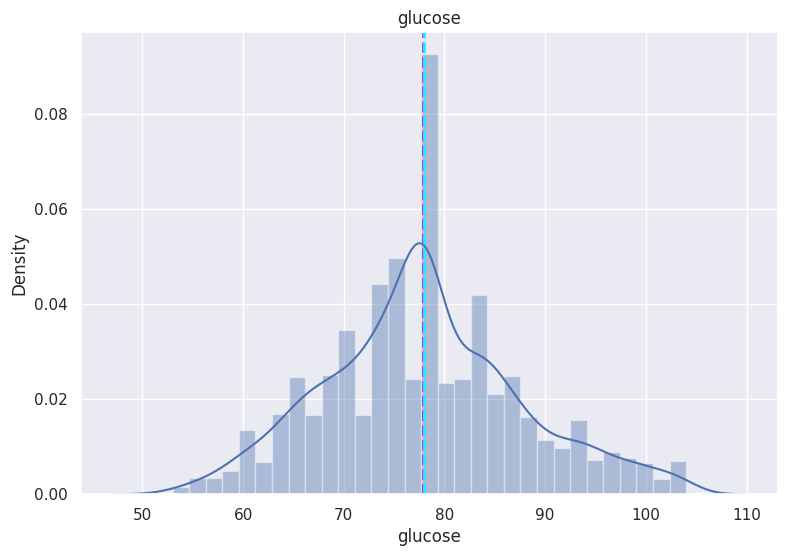

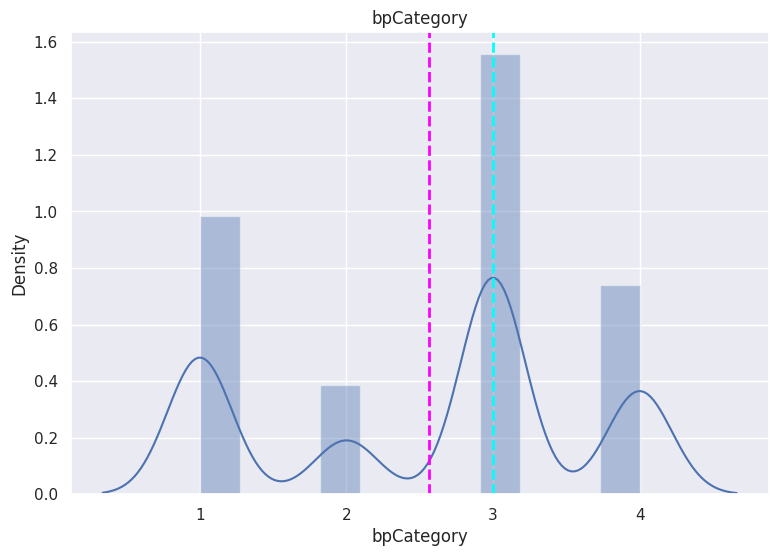

In [196]:
for col in dataset_cardio.loc[:,symmetric_feature]:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (dataset_cardio[col])
  sns.distplot(dataset_cardio[col])#plotting histogram
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)# plotting mean line for data
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)# plotting median line for data
  ax.set_title(col)
plt.show()

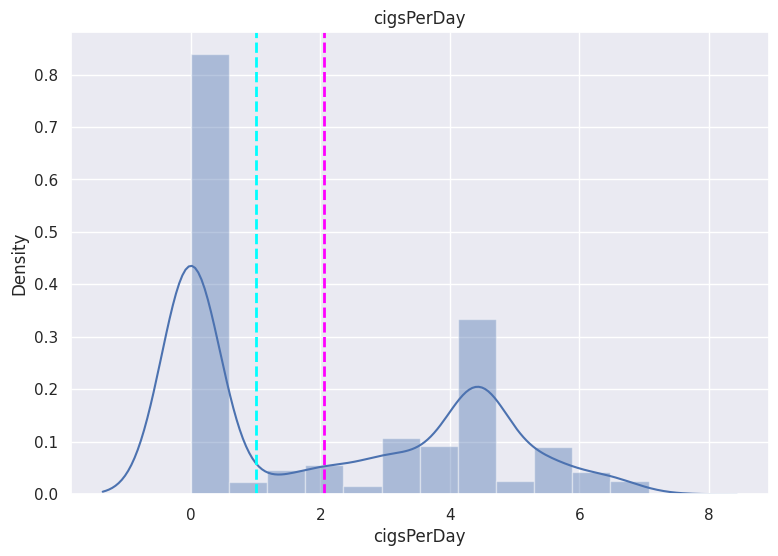

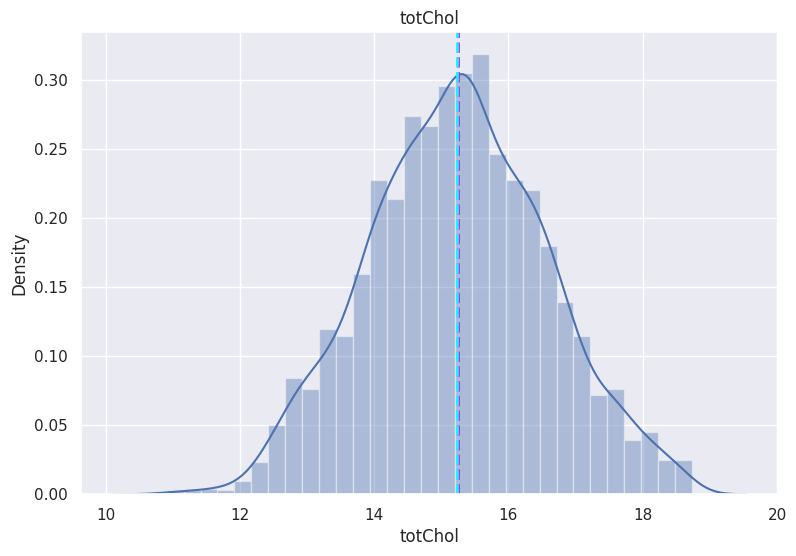

In [197]:
# Visualizing code of hist plot for each columns to know the data distibution
for col in dataset_cardio.loc[:,non_symmetric_feature]:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (dataset_cardio[col])
  sns.distplot(dataset_cardio[col])#plotting histogram
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)# plotting mean line for data
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)# plotting median line for data
  ax.set_title(col)
plt.show()

As the feature , I came to know there are 2 feature which is non symmetric, so aren't following gaussian distribution and rest feature are having symmetric feature. So for this 2 feature I have used exponential transformation.

### 6. Data Scaling

In [198]:
# Standardizing the numerical column
dataset_cardio["BMI"] = StandardScaler().fit_transform(dataset_cardio["BMI"].values.reshape(-1, 1))
dataset_cardio["heartRate"] = StandardScaler().fit_transform(dataset_cardio["heartRate"].values.reshape(-1, 1))
dataset_cardio["glucose"] = StandardScaler().fit_transform(dataset_cardio["glucose"].values.reshape(-1, 1))
dataset_cardio["cigsPerDay"] = StandardScaler().fit_transform(dataset_cardio["cigsPerDay"].values.reshape(-1, 1))
dataset_cardio["totChol"] = StandardScaler().fit_transform(dataset_cardio["totChol"].values.reshape(-1, 1))

##### Which method have you used to scale you data and why?

I have used standardisation for feature scaling as data follows normal distrubution.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

I think , for this dataset dimensionality reduction is not required. As dimensionality reduction problem is used to solved high dimensional problem.

In [199]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [252]:
# Split your data to train and test. Choose Splitting ratio wisely.
# code for spliting the data.
x=dataset_cardio.drop("TenYearCHD",axis=1)
y=dataset_cardio["TenYearCHD"]

# Splitting the dataset into the Training set and Test set in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(dataset_cardio.drop("TenYearCHD",axis=1),dataset_cardio["TenYearCHD"], test_size = 0.2, random_state = 0,shuffle=True,stratify=y)
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (2326, 15)
Number transactions y_train dataset:  (2326,)
Number transactions X_test dataset:  (582, 15)
Number transactions y_test dataset:  (582,)


##### What data splitting ratio have you used and why?

I have used 80:20 ratio for splitting,  as we have already less data 80% data needs model to learn the pattern. I have divide data on the basis of time. First I sort the data on the basis date. Then 1st 80% of data I  kept for training and 20% of data for testing.

### 9. Handling Imbalanced Dataset

<Axes: ylabel='TenYearCHD'>

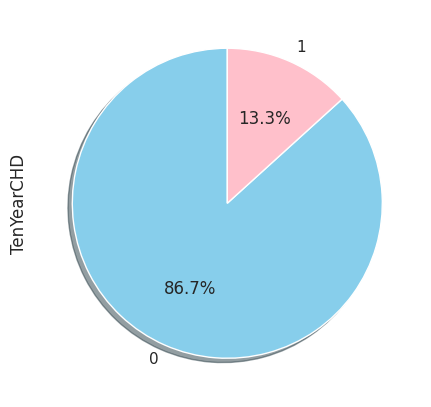

In [201]:
# Dependant Variable Column Visualization
dataset_cardio['TenYearCHD'].value_counts().plot(kind='pie',
                              figsize=(5,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['0','1'],
                               colors=['skyblue','pink'],
                               explode=[0,0]
                              )#plotting pie chart of TenYearCHD column

##### Do you think the dataset is imbalanced? Explain Why.

Yes , data is imbalanced as there are only  13.3% of data available for  people having risk of future coronary heart disease & 86.7% data available for  people not having risk of future coronary heart disease.

In [253]:
# Handaling imbalance dataset using SMOTE
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [254]:
# Splitting the dataset into the Training set and Test set in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0,shuffle=True,stratify=y)
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (4035, 15)
Number transactions y_train dataset:  (4035,)
Number transactions X_test dataset:  (1009, 15)
Number transactions y_test dataset:  (1009,)


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Oversampling the minority class is one way to deal with unbalanced datasets. Duplicating examples from the minority class is the simplest method, but these examples don't provide any new insight into the model. Instead, fresh examples can be created by synthesizing the old ones. The Synthetic Minority Oversampling Technique, or SMOTE for short, is a type of data augmentation for the minority class. I have used SMOTE technique to balance dataset.

## ***7. ML Model Implementation***

### ML Model - 1 Logistic Regression

In [314]:
# ML Model - 1 Implementation
clf = LogisticRegression(fit_intercept=True, max_iter=100000)
# Fit the Algorithm
clf.fit(X_train, y_train)

# Predict on the model
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [315]:
# Checking the coefficients
clf.coef_

array([[-1.97798063e-05,  8.90541595e-02, -1.84026380e-02,
        -5.34038462e-01, -2.90181289e+00,  1.79314361e+00,
         1.09205498e+00,  7.33807035e-03, -6.95348511e-01,
        -5.19019523e-01,  5.48338633e-02,  1.04288406e-01,
        -2.41756198e-03,  1.96939844e-02,  1.20535157e-01]])

In [316]:
# Checking the intercept value
clf.intercept_

array([-3.29346093])

In [317]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", round(train_accuracy*100,2),"%")
print("The accuracy on test data is ", round(test_accuracy*100,2),"%")

The accuracy on train data is  71.3 %
The accuracy on test data is  72.15 %


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[1448  569]
 [ 589 1429]]


[Text(0, 0.5, 'No_risk_tenCHYD'), Text(0, 1.5, 'Risk_tenCHYD')]

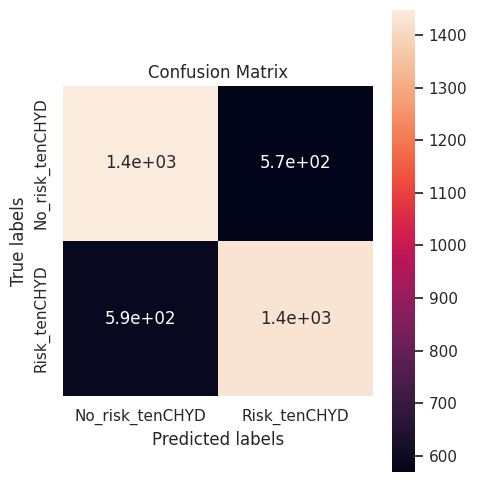

In [320]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for both train

labels = ['No_risk_tenCHYD', 'Risk_tenCHYD']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,square=True) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[368 137]
 [144 360]]


[Text(0, 0.5, 'No_risk_tenCHYD'), Text(0, 1.5, 'Risk_tenCHYD')]

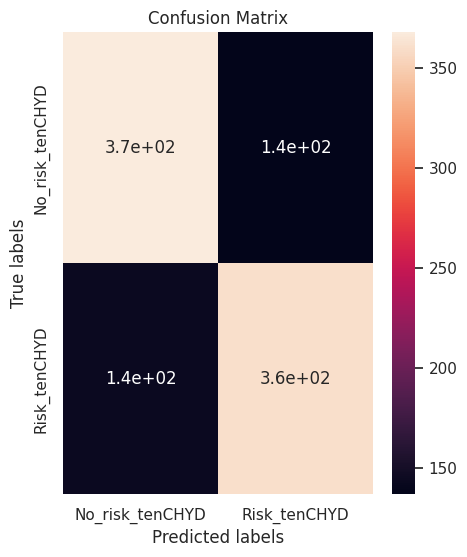

In [260]:
# Get the confusion matrix for both train and test

labels = ['No_risk_tenCHYD', 'Risk_tenCHYD']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,square=True); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [261]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71      2037
           1       0.71      0.72      0.71      1998

    accuracy                           0.71      4035
   macro avg       0.71      0.71      0.71      4035
weighted avg       0.71      0.71      0.71      4035

 
roc_auc_score
0.7130123631982461


In [262]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       512
           1       0.71      0.72      0.72       497

    accuracy                           0.72      1009
   macro avg       0.72      0.72      0.72      1009
weighted avg       0.72      0.72      0.72      1009

 
roc_auc_score
0.7214992927864214


The accuracy of test data is 72% while for training data it is 71%

Precision is 73% . Recall is 72% for TenCHYD=0 and Precision is 71% and recall is 72% for TenCHYD=1 for test data.

Precision is 72% . Recall is 71% for TenCHYD=0 and Precision is 71% and recall is 72% for TenCHYD=1 for training data.

#### 2. Cross- Validation & Hyperparameter Tuning

In [302]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
model = LogisticRegression(max_iter=10000)
solvers = ['lbfgs']
penalty = ['10','l2','14','16','20','18']
c_values = [1000,100, 10, 1.0, 0.1, 0.01,0.001,0.0001]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0)

# Fit the Algorithm
grid_result=grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


# Predict on the model
# Get the predicted classes
train_class_preds = grid_result.predict(X_train)
test_class_preds = grid_result.predict(X_test)

Best: 0.714245 using {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


In [303]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1962
           1       0.71      0.69      0.70      2073

    accuracy                           0.70      4035
   macro avg       0.70      0.70      0.70      4035
weighted avg       0.70      0.70      0.70      4035

 
roc_auc_score
0.6998726877045608


In [304]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69       480
           1       0.73      0.69      0.71       529

    accuracy                           0.70      1009
   macro avg       0.70      0.70      0.70      1009
weighted avg       0.70      0.70      0.70      1009

 
roc_auc_score
0.7017090994813766


##### Which hyperparameter optimization technique have you used and why?

Here , I have used GridSearchCV technique for hyperparameter optimization. Grid Search technique for finding the optimal hyperparameters to increase the model performance. Our 1st goal is to find best hyperparameters values to get the perfect prediction results from the model.

Grid Search assesses the performance for each possible combination of the hyperparameters and their values, chooses the combination with the best performance, and takes that combination as its starting point.

In GridearchCV, along with Grid Search, cross validation is also performed, so that I have used GridsearchCv method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After doing hyperparameter optimization I don't see any improvement in precision, recall, accuracy and f1-score

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

I have used recall as metric as we want to reduce false negative rate. Since false negatives can have fatal implications, they must be avoided at all costs.
Logistic Regression is simple model, interpretable.

### ML Model - 2 Random Forest Classifier

In [266]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Fit the Algorithm
rf_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data
train_class_preds = rf_model.predict(X_train)
test_class_preds = rf_model.predict(X_test)

In [267]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 1.0
The accuracy on test dataset is 0.9038652130822596


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[2017    0]
 [   0 2018]]


[Text(0, 0.5, 'No_risk_tenCHYD'), Text(0, 1.5, 'Risk_tenCHYD')]

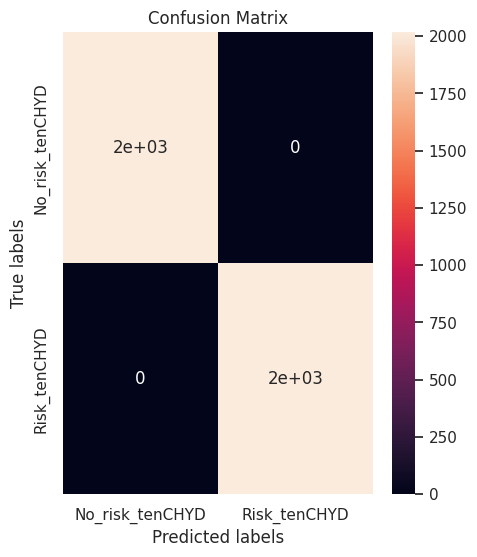

In [268]:
# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['No_risk_tenCHYD', 'Risk_tenCHYD']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,square=True) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[484  21]
 [ 76 428]]


[Text(0, 0.5, 'No_risk_tenCHYD'), Text(0, 1.5, 'Risk_tenCHYD')]

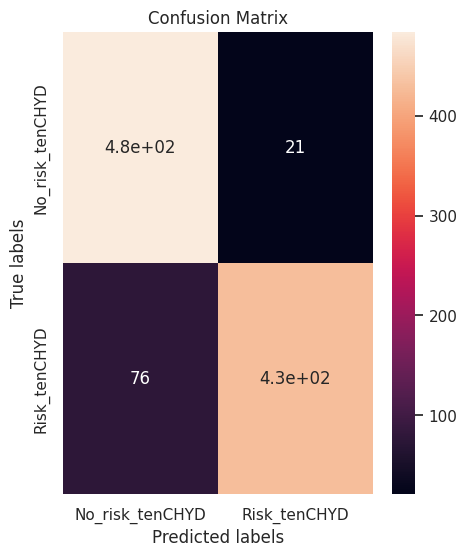

In [269]:
# Get the confusion matrix for both train and test

labels = ['No_risk_tenCHYD', 'Risk_tenCHYD']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,square=True) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [270]:
#printing training performance
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2017
           1       1.00      1.00      1.00      2018

    accuracy                           1.00      4035
   macro avg       1.00      1.00      1.00      4035
weighted avg       1.00      1.00      1.00      4035

 
roc_auc_score
1.0


In [271]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       560
           1       0.85      0.95      0.90       449

    accuracy                           0.90      1009
   macro avg       0.90      0.91      0.90      1009
weighted avg       0.91      0.90      0.90      1009

 
roc_auc_score
0.9038110953952538


The accuracy of test data is 90%  while for training data it is 100% i.e. my model is overfitting.

Precision is 96% . Recall is 86% for TenCHYD=0 and Precision is  85% and recall is  95% for TenCHYD=1 for test data.

Precision is 100% . Recall is 100% for TenCHYD=0 and Precision is  100% and recall is  100% for TenCHYD=1 for training data.

In [272]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [273]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
5        cigsPerDay                0.16
1               age                0.13
2         education                0.13
0                id                0.10
10          totChol                0.09
11              BMI                0.09
12        heartRate                0.09
13          glucose                0.08
4        is_smoking                0.07
14       bpCategory                0.03
3               sex                0.01
6            BPMeds                0.01
8      prevalentHyp                0.01
7   prevalentStroke                0.00
9          diabetes                0.00

In [274]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

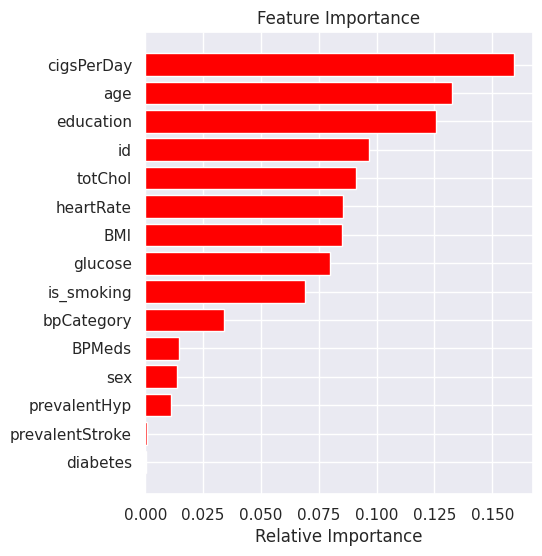

In [275]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [305]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [50,60,70,80,100,200]

# Maximum depth of trees
max_depth = [3,4,5,6,8,9,10]

# Minimum number of samples required to split a node
min_samples_split = [10,20,30,50]

# Minimum number of samples required at each leaf node
min_samples_leaf = [10,20,30,40,50,60]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 3, verbose=2, scoring='recall')


# Fit the Algorithm
rf_grid.fit(X_train,y_train)



# Predict on the model
# Making predictions on train and test data
train_class_preds = rf_grid.predict(X_train)
test_class_preds = rf_grid.predict(X_test)

Fitting 3 folds for each of 1008 candidates, totalling 3024 fits
[CV] END max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=50; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=50; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=60; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=60; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=60; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=70; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=70; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=70; total time=   0.7s
[CV] END max_depth=3, min_

In [306]:
print("Best: %f using %s" % (rf_grid.best_score_, rf_grid.best_params_))

Best: 0.774035 using {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 30, 'n_estimators': 60}


[[1887  130]
 [ 348 1670]]


[Text(0, 0.5, 'No_risk_tenCHYD'), Text(0, 1.5, 'Risk_tenCHYD')]

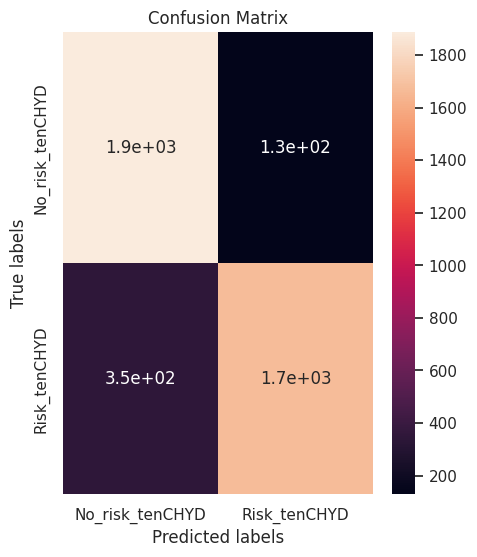

In [307]:

# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['No_risk_tenCHYD', 'Risk_tenCHYD']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,square=True) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [308]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      2235
           1       0.83      0.93      0.87      1800

    accuracy                           0.88      4035
   macro avg       0.88      0.89      0.88      4035
weighted avg       0.89      0.88      0.88      4035

 
roc_auc_score
0.8815499375231248


In [309]:
# Hypertuned Random Forest best model test performance
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84       580
           1       0.75      0.88      0.81       429

    accuracy                           0.83      1009
   macro avg       0.83      0.83      0.83      1009
weighted avg       0.84      0.83      0.83      1009

 
roc_auc_score
0.826487112997014


##### Which hyperparameter optimization technique have you used and why?

Here , I have used GridSearchCV technique for hyperparameter optimization. Grid Search technique for finding the optimal hyperparameters to increase the model performance. Our 1st goal is to find best hyperparameters values to get the perfect prediction results from the model.

Grid Search assesses the performance for each possible combination of the hyperparameters and their values, chooses the combination with the best performance, and takes that combination as its starting point.

In GridearchCV, along with Grid Search, cross validation is also performed, so that I have used GridsearchCv method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No. I haven't see any improvement in Random Forest Classifier model after used Gridsearch hyperparameter optimization technique.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

I have used recall as metric as we want to reduce false negative rate. Since false negatives can have fatal implications, they must be avoided at all costs.
Random forest is robust model, have feature importance,versatality, scalable.

### ML Model - 3

In [281]:
# ML Model - 3 Implementation
# Create an instance of the RandomForestClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
xg_models=xg_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data

train_class_preds = xg_models.predict(X_train)
test_class_preds = xg_models.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[2017    0]
 [   2 2016]]


[Text(0, 0.5, 'No_risk_tenCHYD'), Text(0, 1.5, 'Risk_tenCHYD')]

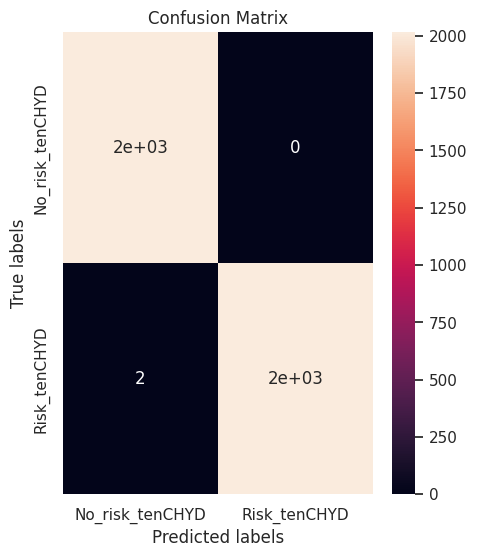

In [282]:
# Visualizing evaluation Metric Score chart
# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['No_risk_tenCHYD', 'Risk_tenCHYD']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,square=True) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[482  23]
 [ 88 416]]


[Text(0, 0.5, 'No_risk_tenCHYD'), Text(0, 1.5, 'Risk_tenCHYD')]

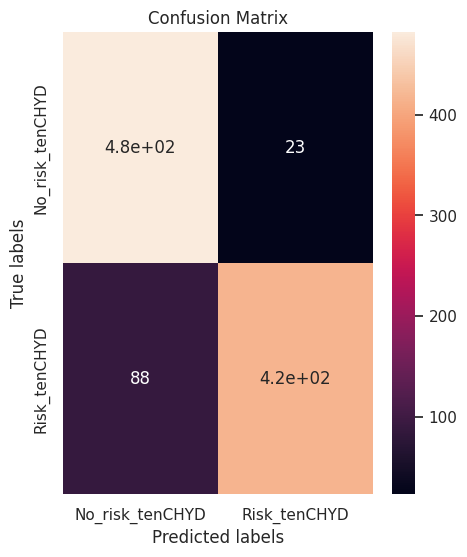

In [283]:
# Get the confusion matrix for both train and test

labels = ['No_risk_tenCHYD', 'Risk_tenCHYD']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,square=True) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [284]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2019
           1       1.00      1.00      1.00      2016

    accuracy                           1.00      4035
   macro avg       1.00      1.00      1.00      4035
weighted avg       1.00      1.00      1.00      4035

 
roc_auc_score
0.9995044598612488


In [285]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       570
           1       0.83      0.95      0.88       439

    accuracy                           0.89      1009
   macro avg       0.89      0.90      0.89      1009
weighted avg       0.90      0.89      0.89      1009

 
roc_auc_score
0.8899261354706899


The accuracy of test data is 89%  while for training data it is 100% i.e. my model is overfitting.

Precision is 95% . Recall is 85% for TenCHYD=0 and Precision is  83% and recall is  95% for TenCHYD=1 for test data.

Precision is 100% . Recall is 100% for TenCHYD=0 and Precision is  100% and recall is  100% for TenCHYD=1 for training data.




In [286]:
importances = xg_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [287]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
4        is_smoking                0.56
2         education                0.12
5        cigsPerDay                0.10
1               age                0.05
6            BPMeds                0.04
0                id                0.02
8      prevalentHyp                0.02
10          totChol                0.02
11              BMI                0.02
12        heartRate                0.02
13          glucose                0.02
14       bpCategory                0.02
3               sex                0.01
7   prevalentStroke                0.00
9          diabetes                0.00

In [288]:
features = X_train.columns
importances = xg_model.feature_importances_
indices = np.argsort(importances)

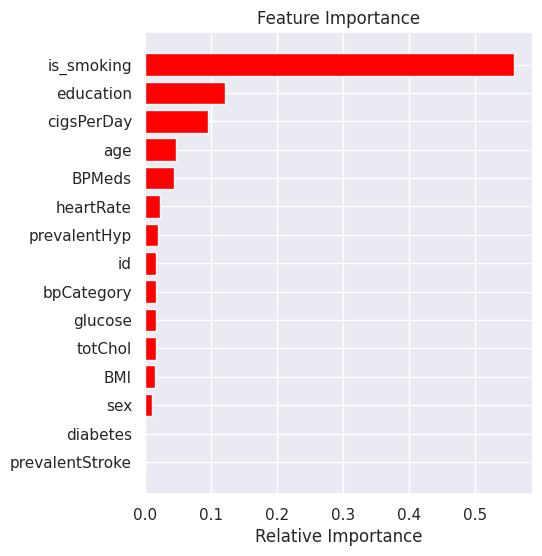

In [289]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [311]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [50,60,70,80,100,200]

# Maximum depth of trees
max_depth = [3,4,5,6,8,9,10]

# Minimum number of samples required to split a node
min_samples_split = [10,20,30,50]

# Minimum number of samples required at each leaf node
min_samples_leaf = [10,20,30,40,50,60]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
# Grid search
xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid = param_dict,
                       cv = 3, verbose=2, scoring='recall')

xg_grid1=xg_grid.fit(X_train,y_train)
# Predict on the model
# Making predictions on train and test data

train_class_preds = xg_grid1.predict(X_train)
test_class_preds = xg_grid1.predict(X_test)

Streaming output truncated to the last 5000 lines.
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=30, n_estimators=80; total time=   0.5s
[14:58:42] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=30, n_estimators=80; total time=   0.4s
[14:58:42] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=30, n_estimators=100; total time=   0.6s
[14:58:43] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=30, n_estimators=100; total time=   0.6s
[14:58:43] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=30, n_estimators=100; 

In [312]:
print("Best: %f using %s" % (xg_grid.best_score_, xg_grid.best_params_))

Best: 0.858776 using {'max_depth': 9, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 200}


[[2017    0]
 [   0 2018]]


[Text(0, 0.5, 'No_risk_tenCHYD'), Text(0, 1.5, 'Risk_tenCHYD')]

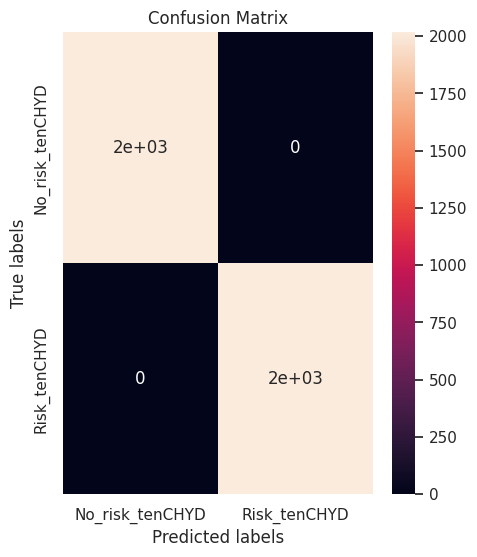

In [292]:
# Visualizing evaluation Metric Score chart
# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels =  ['No_risk_tenCHYD', 'Risk_tenCHYD']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,square=True) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[482  23]
 [ 82 422]]


[Text(0, 0.5, 'No_risk_tenCHYD'), Text(0, 1.5, 'Risk_tenCHYD')]

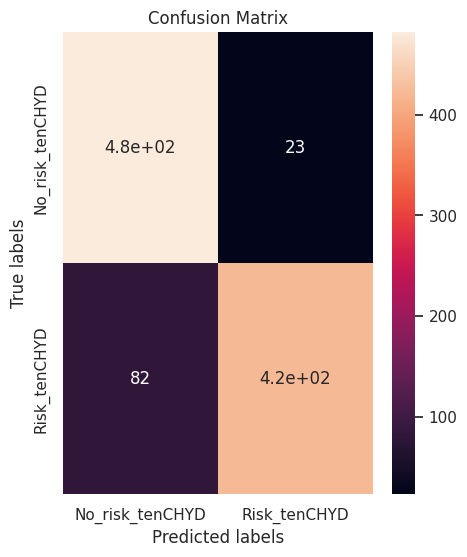

In [293]:
# Get the confusion matrix for both train and test

labels =  ['No_risk_tenCHYD', 'Risk_tenCHYD']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,square=True) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [294]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2017
           1       1.00      1.00      1.00      2018

    accuracy                           1.00      4035
   macro avg       1.00      1.00      1.00      4035
weighted avg       1.00      1.00      1.00      4035

 
roc_auc_score
1.0


In [295]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       564
           1       0.84      0.95      0.89       445

    accuracy                           0.90      1009
   macro avg       0.90      0.90      0.90      1009
weighted avg       0.90      0.90      0.90      1009

 
roc_auc_score
0.8958785164230709


##### Which hyperparameter optimization technique have you used and why?

Here , I have used GridSearchCV technique for hyperparameter optimization. Grid Search technique for finding the optimal hyperparameters to increase the model performance. Our 1st goal is to find best hyperparameters values to get the perfect prediction results from the model.

Grid Search assesses the performance for each possible combination of the hyperparameters and their values, chooses the combination with the best performance, and takes that combination as its starting point.

In GridearchCV, along with Grid Search, cross validation is also performed, so that I have used GridsearchCv method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No, I don't se any improvement after Gridsearch hyperparameter optimization technique used for XGboost classifier.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I would like to use Recall metrics. To reduce false negative, recall is important.Since false negatives can have fatal implications, they must be avoided at all costs.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I will use Random Forest classifier as we get better recall for this classifier compared to logistic regression and xgboost classifier.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [296]:
#Get shap values
explainer = shap.Explainer(xg_models)
shap_values = explainer(X_test)

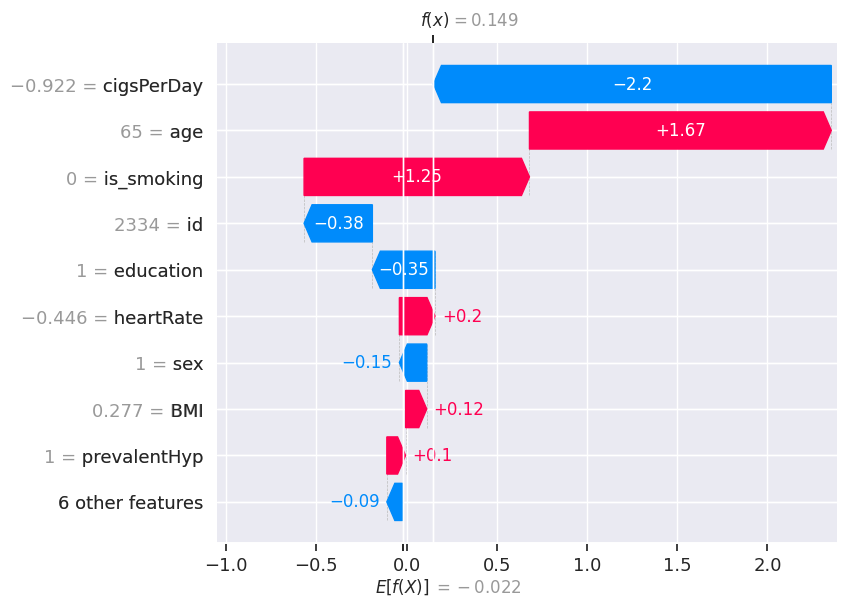

In [297]:
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

I have used "shap" model explanibility tool. Shap mode; have code to create waterfall plot for the 1st abalone for our dataset. This plots use to visualize the SHAP values for each column.

In [298]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Forceplot for first observation
shap.plots.force(shap_values[0])

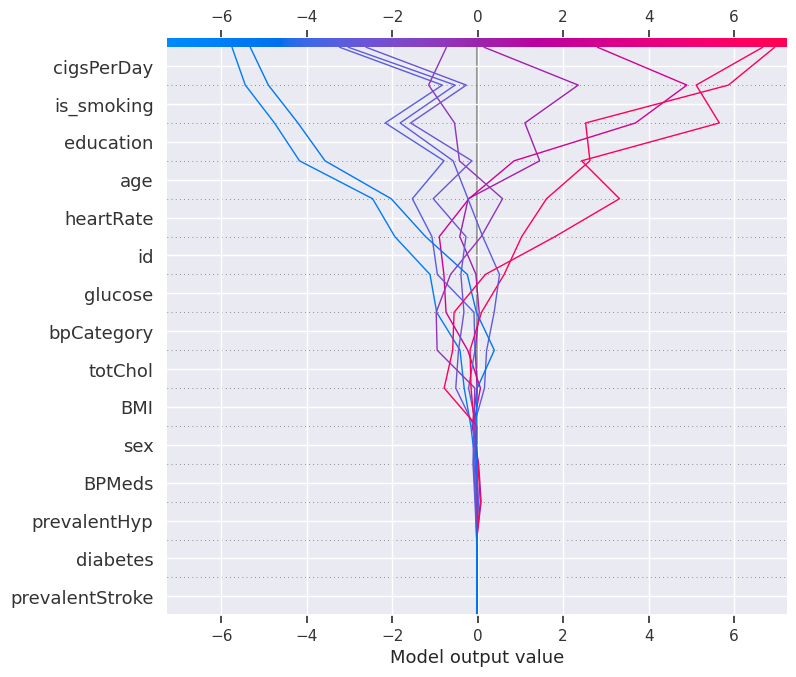

In [299]:
# Get expected value and shap values array
expected_value = explainer.expected_value
shap_array = explainer.shap_values(X_test)

#Descion plot for first 10 observations
shap.decision_plot(expected_value, shap_array[0:10],feature_names=list(X_test.columns))

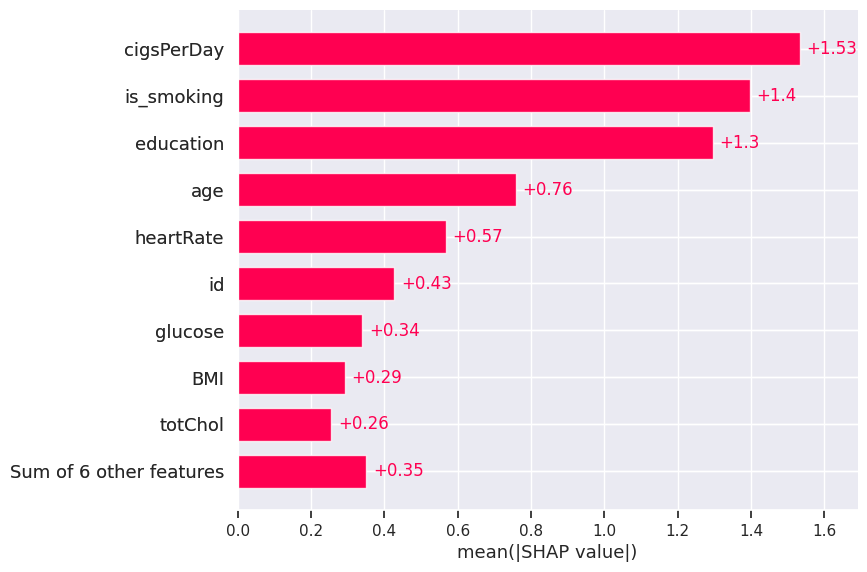

In [300]:
#Mean SHAP
shap.plots.bar(shap_values)

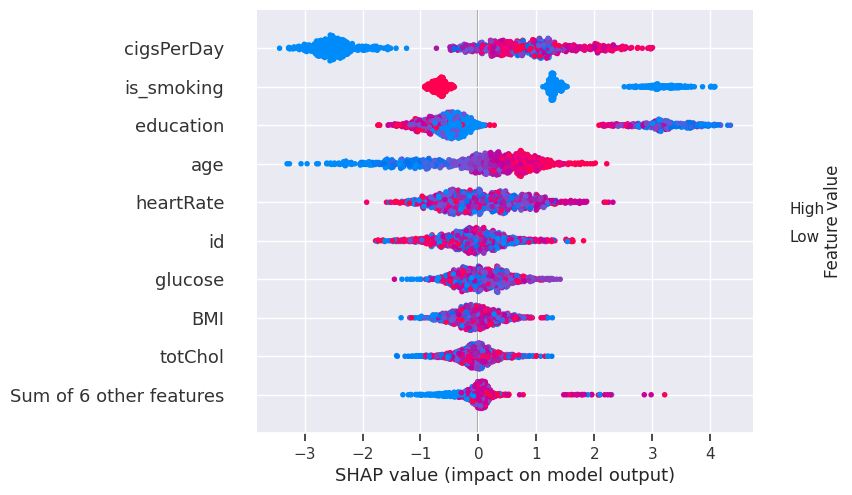

In [301]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [328]:
# Save the File
# Save the File
import pickle

best_model =rf_grid
filename = 'bestmodel.pkl'


with open(filename, 'wb') as f:
    pickle.dump(best_model, f)


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [330]:
# Load the File and predict unseen data.
# Load the File and predict unseen data.
with open(filename, 'rb') as f:
      model = pickle.load(f)




model.predict(X_test)


array([0, 0, 0, ..., 1, 1, 0])

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In conclusion, all of the  feature/variable provided in dataset are significant and have an impact on the likelihood of acquiring coronary heart disease. However, several very important characteristics can be identified, such as:

1)People having hypertention having higher chances of coronary disease.

2)People having high diabets with high glucose level also having high risk of coronary disease.

3)Smoking habit also increase chances of coronary heart disease.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***